In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import sys
sys.path.append('../')

from scripts.proj1_helpers import *
from scripts.implementations import *
from scripts.plots import *

SEED = 42

# Load train data

In [3]:
# Load data
y, tx, ids = load_csv_data('../data/train.csv')

# Normalise data
tx, mean_tx, std_tx = standardise(tx)

# Check shape of data
print('Shape: y: {}, x:{}\n'.format(y.shape, tx.shape))

num_samples, num_dim = tx.shape

# Check that data is normalised
print(np.mean(tx, axis=0), np.std(tx, axis=0))

# Split into train and evaluation set
(tx_train, y_train), (tx_eval, y_eval) = train_eval_split(y, tx, split_ratio=.7, seed=SEED)

Shape: y: (250000,), x:(250000, 30)

[-2.50602916e-15  4.49575133e-15 -3.48448848e-15  7.18646387e-15
 -2.36304576e-14 -3.26035021e-15  1.26038877e-14  2.16223188e-14
  6.40057962e-15  2.86143687e-15 -6.98486646e-15  3.63458152e-15
 -1.27422117e-14 -5.95722149e-15  1.35646161e-16  7.13136217e-17
  2.58023760e-14 -1.06327391e-16 -1.87188487e-16  8.24115935e-15
  1.41040513e-16 -8.99509711e-15 -6.01698247e-16 -4.92204144e-15
  3.11615622e-15 -1.67606551e-15 -9.40773592e-15  1.79148900e-14
 -5.09692022e-15 -1.77122317e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# Load test data

In [4]:
y_test, tx_test, ids_test = load_csv_data('../data/test.csv')

# Don't forget to standardise to same mean and std
tx_test = standardise_to_fixed(tx_test, mean_tx, std_tx)

# 0 Random baseline guessing

In [7]:
# Get baseline frequency of the two classes in training data
prior_probs = [sum(y_train == 1)/len(y_train), sum(y_train == -1)/len(y_train)]

# Test error on evaluation set
y_eval_pred = np.random.choice([1., -1.], size=len(y_eval), p=prior_probs)

acc_baseline = get_accuracy(y_eval_pred, y_eval)
f1_baseline = get_f1_score(y_eval_pred, y_eval)

print('Accuracy Baseline {}'.format(acc_baseline))
print('F1 Baseline {}'.format(f1_baseline))

# Save in submission file
y_test_pred = np.random.choice([1., -1.], size=len(y_eval), p=prior_probs)
create_csv_submission(ids_test, y_test_pred, '../data/random_baseline_submission.csv')

Accuracy Baseline 0.5487733333333333
F1 Baseline 0.3431288819875776


The accuracy on the test after submission to the AICrowd platform for the random guess model is 55%. This is thus our baseline. Anything that goes below that is probably overfitting or a model that diverged. 

# 1 Least-squares

## 1.1 Least-squares 

In [5]:
# Get linear least-squares model
w_ls, mse_ls = least_squares(y_train, tx_train)

# Test error on evaluation set
y_eval_pred = predict_labels(w_ls, tx_eval)

acc_ls = get_accuracy(y_eval_pred, y_eval)
f1_ls = get_f1_score(y_eval_pred, y_eval)

print('Accuracy LS on evaluation set: ', acc_ls)
print('F1 Score LS on evaluation set:', f1_ls)

# Save current mode predictions on test set
y_test_pred = predict_labels(w_ls, tx_test)
create_csv_submission(ids_test, y_test_pred, '../data/least_squares_submission.csv')

Accuracy LS on evaluation set:  0.7192133333333334
F1 Score LS on evaluation set: 0.6679176850902784


## 1.2 Least-squares gradient descent 

In [9]:
# Define hyperparameters for gradient descent
max_iters = 1000
gamma = .1

# Initial weights vector to train a linear model
initial_w = np.zeros(num_dim)

# Run gradient descent under MSE loss to find optimal weights
w_GD, mse_GD = least_squares_GD(y_train, tx_train, initial_w, max_iters, gamma)

Gradient Descent(0/999): loss=0.4632708999621822, gradient=0.7904131174682191
Gradient Descent(1/999): loss=0.44826542306471534, gradient=0.42098180519313166
Gradient Descent(2/999): loss=0.43881330725425555, gradient=0.3233296967125444
Gradient Descent(3/999): loss=0.4324157757580377, gradient=0.26440473230784073
Gradient Descent(4/999): loss=0.42792601927563717, gradient=0.22057970805408061
Gradient Descent(5/999): loss=0.4246576177432147, gradient=0.18738412392577616
Gradient Descent(6/999): loss=0.4221854023539241, gradient=0.1622418395708655
Gradient Descent(7/999): loss=0.4202428682378767, gradient=0.1431888904535042
Gradient Descent(8/999): loss=0.4186610098049385, gradient=0.12869565869111343
Gradient Descent(9/999): loss=0.4173312028906516, gradient=0.11758315001644261
Gradient Descent(10/999): loss=0.4161825415565521, gradient=0.10895802290524811
Gradient Descent(11/999): loss=0.4151679185830494, gradient=0.10215580984853084
Gradient Descent(12/999): loss=0.41425541799571197,

Gradient Descent(110/999): loss=0.3923348208732033, gradient=0.022929911502369383
Gradient Descent(111/999): loss=0.39228365292858614, gradient=0.022681718408139564
Gradient Descent(112/999): loss=0.39223358448398415, gradient=0.022436605074609938
Gradient Descent(113/999): loss=0.3921845902228053, gradient=0.022194524702805515
Gradient Descent(114/999): loss=0.39213664546576305, gradient=0.02195543143779676
Gradient Descent(115/999): loss=0.39208972615286586, gradient=0.02171928034172256
Gradient Descent(116/999): loss=0.39204380882599377, gradient=0.02148602736789228
Gradient Descent(117/999): loss=0.39199887061204614, gradient=0.021255629335916657
Gradient Descent(118/999): loss=0.3919548892066322, gradient=0.02102804390780937
Gradient Descent(119/999): loss=0.3919118428582885, gradient=0.02080322956501232
Gradient Descent(120/999): loss=0.39186971035319873, gradient=0.020581145586297363
Gradient Descent(121/999): loss=0.39182847100040075, gradient=0.020361752026500982
Gradient Desc

Gradient Descent(221/999): loss=0.39010729501934016, gradient=0.007389565905370962
Gradient Descent(222/999): loss=0.3901019651916931, gradient=0.007318238768470674
Gradient Descent(223/999): loss=0.39009673767165765, gradient=0.007247648557910911
Gradient Descent(224/999): loss=0.39009161042733614, gradient=0.007177786959728106
Gradient Descent(225/999): loss=0.39008658146881015, gradient=0.007108645767252681
Gradient Descent(226/999): loss=0.3900816488472282, gradient=0.0070402168794922336
Gradient Descent(227/999): loss=0.3900768106539153, gradient=0.006972492299543821
Gradient Descent(228/999): loss=0.39007206501950503, gradient=0.006905464133033001
Gradient Descent(229/999): loss=0.3900674101130872, gradient=0.0068391245865808675
Gradient Descent(230/999): loss=0.39006284414138, gradient=0.0067734659662972655
Gradient Descent(231/999): loss=0.39005836534791694, gradient=0.006708480676299856
Gradient Descent(232/999): loss=0.3900539720122556, gradient=0.006644161217259245
Gradient 

Gradient Descent(322/999): loss=0.38986608281759627, gradient=0.002859633949928468
Gradient Descent(323/999): loss=0.3898652834560979, gradient=0.0028337215802011163
Gradient Descent(324/999): loss=0.3898644985034882, gradient=0.0028080614622333117
Gradient Descent(325/999): loss=0.38986372769040606, gradient=0.002782651072781313
Gradient Descent(326/999): loss=0.3898629707526488, gradient=0.0027574879157774724
Gradient Descent(327/999): loss=0.3898622274310706, gradient=0.002732569522000712
Gradient Descent(328/999): loss=0.3898614974714841, gradient=0.002707893448751452
Gradient Descent(329/999): loss=0.3898607806245617, gradient=0.0026834572795311627
Gradient Descent(330/999): loss=0.3898600766457413, gradient=0.002659258623726291
Gradient Descent(331/999): loss=0.3898593852951331, gradient=0.0026352951162967758
Gradient Descent(332/999): loss=0.38985870633742714, gradient=0.0026115644174686584
Gradient Descent(333/999): loss=0.38985803954180503, gradient=0.0025880642124308873
Gradi

Gradient Descent(429/999): loss=0.38982747970565257, gradient=0.001128656100157891
Gradient Descent(430/999): loss=0.38982735488485654, gradient=0.0011195018656825787
Gradient Descent(431/999): loss=0.38982723207662645, gradient=0.0011104363430891624
Gradient Descent(432/999): loss=0.38982711124533587, gradient=0.001101458684785336
Gradient Descent(433/999): loss=0.3898269923560117, gradient=0.0010925680513343447
Gradient Descent(434/999): loss=0.3898268753743216, gradient=0.0010837636113696716
Gradient Descent(435/999): loss=0.38982676026656365, gradient=0.0010750445415106794
Gradient Descent(436/999): loss=0.38982664699965314, gradient=0.0010664100262790597
Gradient Descent(437/999): loss=0.38982653554111135, gradient=0.0010578592580165584
Gradient Descent(438/999): loss=0.3898264258590542, gradient=0.0010493914368032117
Gradient Descent(439/999): loss=0.38982631792218125, gradient=0.0010410057703769528
Gradient Descent(440/999): loss=0.38982621169976517, gradient=0.00103270147405380

Gradient Descent(528/999): loss=0.38982108917531, gradient=0.0005453223966008932
Gradient Descent(529/999): loss=0.38982105990765414, gradient=0.0005418555447101441
Gradient Descent(530/999): loss=0.38982103100935106, gradient=0.0005384226538749416
Gradient Descent(531/999): loss=0.3898210024744714, gradient=0.0005350233881785119
Gradient Descent(532/999): loss=0.38982097429719004, gradient=0.0005316574147786913
Gradient Descent(533/999): loss=0.3898209464717836, gradient=0.000528324403880492
Gradient Descent(534/999): loss=0.3898209189926279, gradient=0.0005250240287092513
Gradient Descent(535/999): loss=0.38982089185419727, gradient=0.0005217559654840554
Gradient Descent(536/999): loss=0.38982086505106167, gradient=0.0005185198933912531
Gradient Descent(537/999): loss=0.38982083857788635, gradient=0.000515315494558541
Gradient Descent(538/999): loss=0.38982081242942807, gradient=0.0005121424540292101
Gradient Descent(539/999): loss=0.38982078660053576, gradient=0.0005090004597366613


Gradient Descent(632/999): loss=0.3898192885966393, gradient=0.00031751523693664845
Gradient Descent(633/999): loss=0.38981927861597904, gradient=0.00031623863671338974
Gradient Descent(634/999): loss=0.3898192687149043, gradient=0.00031497365791990516
Gradient Descent(635/999): loss=0.389819258892378, gradient=0.00031372017863941416
Gradient Descent(636/999): loss=0.3898192491473785, gradient=0.00031247807824350227
Gradient Descent(637/999): loss=0.3898192394788999, gradient=0.00031124723738089
Gradient Descent(638/999): loss=0.3898192298859529, gradient=0.0003100275379659805
Gradient Descent(639/999): loss=0.3898192203675622, gradient=0.00030881886316784605
Gradient Descent(640/999): loss=0.3898192109227688, gradient=0.00030762109739891
Gradient Descent(641/999): loss=0.3898192015506274, gradient=0.00030643412630389065
Gradient Descent(642/999): loss=0.38981919225020817, gradient=0.0003052578367488399
Gradient Descent(643/999): loss=0.38981918302059454, gradient=0.0003040921168100996

Gradient Descent(741/999): loss=0.3898185165922361, gradient=0.00022713954479535478
Gradient Descent(742/999): loss=0.3898185114620576, gradient=0.0002266264784342257
Gradient Descent(743/999): loss=0.3898185063548762, gradient=0.00022611728085441537
Gradient Descent(744/999): loss=0.38981850127046785, gradient=0.00022561191639588882
Gradient Descent(745/999): loss=0.3898184962086114, gradient=0.0002251103498024242
Gradient Descent(746/999): loss=0.389818491169088, gradient=0.0002246125462166828
Gradient Descent(747/999): loss=0.38981848615168163, gradient=0.00022411847117538588
Gradient Descent(748/999): loss=0.38981848115617884, gradient=0.0002236280906044536
Gradient Descent(749/999): loss=0.3898184761823687, gradient=0.00022314137081427807
Gradient Descent(750/999): loss=0.38981847123004304, gradient=0.00022265827849496543
Gradient Descent(751/999): loss=0.3898184662989962, gradient=0.00022217878071175825
Gradient Descent(752/999): loss=0.38981846138902476, gradient=0.0002217028449

Gradient Descent(840/999): loss=0.3898180931311505, gradient=0.00019074207734811582
Gradient Descent(841/999): loss=0.389818089505027, gradient=0.00019048721577443888
Gradient Descent(842/999): loss=0.38981808588852274, gradient=0.00019023405249394626
Gradient Descent(843/999): loss=0.38981808228156095, gradient=0.00018998257487294078
Gradient Descent(844/999): loss=0.38981807868406565, gradient=0.00018973277039408955
Gradient Descent(845/999): loss=0.3898180750959618, gradient=0.00018948462665513278
Gradient Descent(846/999): loss=0.38981807151717474, gradient=0.00018923813136735083
Gradient Descent(847/999): loss=0.38981806794763063, gradient=0.0001889932723543479
Gradient Descent(848/999): loss=0.38981806438725625, gradient=0.00018875003755059052
Gradient Descent(849/999): loss=0.3898180608359794, gradient=0.00018850841500009922
Gradient Descent(850/999): loss=0.3898180572937281, gradient=0.00018826839285516762
Gradient Descent(851/999): loss=0.38981805376043127, gradient=0.00018802

Gradient Descent(940/999): loss=0.3898177680632852, gradient=0.00017198961706994513
Gradient Descent(941/999): loss=0.38981776511095545, gradient=0.00017185654991901635
Gradient Descent(942/999): loss=0.3898177621631608, gradient=0.00017172432624358797
Gradient Descent(943/999): loss=0.3898177592198687, gradient=0.00017159294040966486
Gradient Descent(944/999): loss=0.38981775628104737, gradient=0.00017146238682321524
Gradient Descent(945/999): loss=0.38981775334666524, gradient=0.00017133265992984233
Gradient Descent(946/999): loss=0.38981775041669076, gradient=0.0001712037542144532
Gradient Descent(947/999): loss=0.38981774749109266, gradient=0.0001710756642008298
Gradient Descent(948/999): loss=0.3898177445698403, gradient=0.00017094838445134316
Gradient Descent(949/999): loss=0.38981774165290256, gradient=0.0001708219095665793
Gradient Descent(950/999): loss=0.3898177387402495, gradient=0.0001706962341851198
Gradient Descent(951/999): loss=0.3898177358318507, gradient=0.00017057135

In [10]:
# Test error on evaluation set
y_eval_pred = predict_labels(w_GD, tx_eval)

acc_GD = get_accuracy(y_eval_pred, y_eval)
f1_GD = get_f1_score(y_eval_pred, y_eval)

print('Accuracy on evaluation set: ', acc_GD)
print('F1 Score on evaluation set:', f1_GD)

# Save current model predictions on test set
y_test_pred = predict_labels(w_GD, tx_test)
create_csv_submission(ids_test, y_test_pred, '../data/ls_gd_submission.csv')

Accuracy on evaluation set:  0.7182533333333333
F1 Score on evaluation set: 0.6675163244433955


Accuracy on evaluation set very similar so GD seems to find a good solution

## 1.3 Least-squares SGD

In [11]:
# Define hyperparameters for gradient descent
max_iters = 1000
gamma = .05

# Initial weights vector to train a linear model
initial_w = np.zeros(num_dim)

# Run gradient descent under MSE loss to find optimal weights
w_SGD, mse_SGD = least_squares_SGD(y_train, tx_train, initial_w, max_iters, gamma)

Stochastic GD(0/999): loss=0.6689394498538589, gradient=5.658154857955742
Stochastic GD(1/999): loss=0.49576949037927287, gradient=3.3990562973214513
Stochastic GD(2/999): loss=0.5739300421126895, gradient=2.041934871421115
Stochastic GD(3/999): loss=0.5176405587078589, gradient=1.2266634190234653
Stochastic GD(4/999): loss=0.5480865888940792, gradient=0.7369006546830341
Stochastic GD(5/999): loss=0.5285807229645564, gradient=0.4426826189245766
Stochastic GD(6/999): loss=0.53985981688647, gradient=0.265935306004328
Stochastic GD(7/999): loss=0.5329257132425718, gradient=0.15975686407436065
Stochastic GD(8/999): loss=0.5370341325279868, gradient=0.09597167071324571
Stochastic GD(9/999): loss=0.5345454351564917, gradient=0.05765362028641643
Stochastic GD(10/999): loss=0.5360330424037608, gradient=0.03463459484895323
Stochastic GD(11/999): loss=0.5351366976018693, gradient=0.020806241731079176
Stochastic GD(12/999): loss=0.5356741947549325, gradient=0.01249905468390935
Stochastic GD(13/99

Stochastic GD(118/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(119/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(120/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(121/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(122/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(123/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(124/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(125/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(126/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(127/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(128/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(129/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(130/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(131/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(132/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(133/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(134/999): 

Stochastic GD(259/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(260/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(261/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(262/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(263/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(264/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(265/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(266/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(267/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(268/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(269/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(270/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(271/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(272/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(273/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(274/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(275/999): 

Stochastic GD(394/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(395/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(396/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(397/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(398/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(399/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(400/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(401/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(402/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(403/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(404/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(405/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(406/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(407/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(408/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(409/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(410/999): 

Stochastic GD(532/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(533/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(534/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(535/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(536/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(537/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(538/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(539/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(540/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(541/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(542/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(543/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(544/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(545/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(546/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(547/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(548/999): 

Stochastic GD(670/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(671/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(672/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(673/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(674/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(675/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(676/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(677/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(678/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(679/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(680/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(681/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(682/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(683/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(684/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(685/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(686/999): 

Stochastic GD(809/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(810/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(811/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(812/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(813/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(814/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(815/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(816/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(817/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(818/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(819/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(820/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(821/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(822/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(823/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(824/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(825/999): 

Stochastic GD(948/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(949/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(950/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(951/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(952/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(953/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(954/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(955/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(956/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(957/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(958/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(959/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(960/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(961/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(962/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(963/999): loss=0.535472136988432, gradient=0.0
Stochastic GD(964/999): 

In [12]:
# Test error on evaluation set
y_eval_pred = predict_labels(w_SGD, tx_eval)

acc_SGD = get_accuracy(y_eval_pred, y_eval)
f1_SGD = get_f1_score(y_eval_pred, y_eval)

print('Accuracy on evaluation set: ', acc_SGD)
print('F1 Score on evaluation set:', f1_SGD)

# Save current model predictions on test set
y_test_pred = predict_labels(w_SGD, tx_test)
create_csv_submission(ids_test, y_test_pred, '../data/ls_sgd_submission.csv')

Accuracy on evaluation set:  0.62456
F1 Score on evaluation set: 0.4112407477104504


Does not yield very satisfactor result. Could run some hyperparameter optimisation to get better results. 

# 2 Ridge regression

## 2.1 Hyperparameter optimisation 

Minimum test error 0.3894215801774716 with lambda 5.6234132519034905e-08


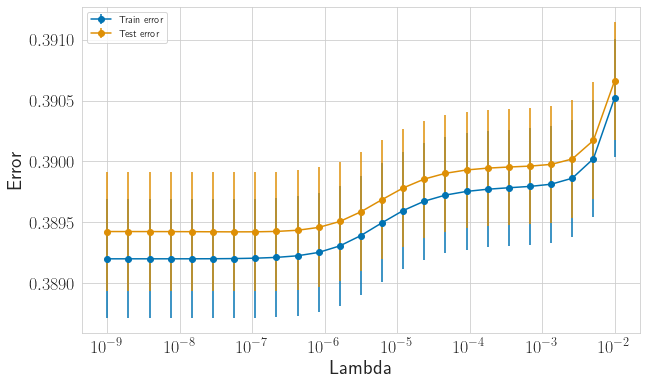

In [45]:
k_fold = 5
lambdas = np.logspace(-9, -2, 25)

mse_train = np.empty((len(lambdas), k_fold), float)
mse_test = np.empty((len(lambdas), k_fold), float)

for l, lambda_ in enumerate(lambdas):
    k = 0
    for train_split, test_split in k_fold_iter(y_train, tx_train, k_fold):
        # Train
        w, mse_tr = ridge_regression(train_split[1], train_split[0], lambda_)
        mse_train[l, k] = mse_tr

        # Test
        mse_te = compute_loss_mse(test_split[1], test_split[0], w)
        mse_test[l, k] = mse_te
        
        k += 1

fig = cross_validation_visualization(lambdas, mse_train, mse_test)

avg_mse_test = np.mean(mse_test, axis=1)
lambda_opt = lambdas[np.argmin(avg_mse_test)]

print('Minimum test error {} with lambda {}'.format(np.min(avg_mse_test), lambda_opt))

## 2.2 Ridge regression

In [47]:
# Find optimal ridge regression model under lambda_opt
w_ridge, mse_ridge = ridge_regression(y_train, tx_train, lambda_opt)

# Test error on evaluation set
y_eval_pred = predict_labels(w_ridge, tx_eval)

acc_ridge = get_accuracy(y_eval_pred, y_eval)
f1_ridge = get_f1_score(y_eval_pred, y_eval)

print('Accuracy on evaluation set: ', acc_ridge)
print('F1 Score on evaluation set:', f1_ridge)

# Save current model predictions on test set
y_test_pred = predict_labels(w_ridge, tx_test)
create_csv_submission(ids_test, y_test_pred, '../data/ridge_submission.csv')

Accuracy on evaluation set:  0.71908
F1 Score on evaluation set: 0.6677704716400965


# 3 Lasso regression

## 3.1 Hyperparameter optimisation

Gradient Descent(0/99): loss=0.4627782705549722, gradient=0.7974960150381895
Gradient Descent(1/99): loss=0.4476418201429259, gradient=0.42336927082495096
Gradient Descent(2/99): loss=0.4381324589846833, gradient=0.32440122047931885
Gradient Descent(3/99): loss=0.4317037774796922, gradient=0.26507794159929615
Gradient Descent(4/99): loss=0.42719549163612036, gradient=0.22104900921204754
Gradient Descent(5/99): loss=0.42391495773059823, gradient=0.18773693969660876
Gradient Descent(6/99): loss=0.42143380660252533, gradient=0.16253369354295727
Gradient Descent(7/99): loss=0.41948389649777623, gradient=0.14345533315799514
Gradient Descent(8/99): loss=0.41789541062078456, gradient=0.1289577533806581
Gradient Descent(9/99): loss=0.4165593432208432, gradient=0.11785179426692226
Gradient Descent(10/99): loss=0.4154046245547404, gradient=0.10923747948869804
Gradient Descent(11/99): loss=0.41438408967187157, gradient=0.10244640663647865
Gradient Descent(12/99): loss=0.4134658133208543, gradient

Gradient Descent(5/99): loss=0.3928167341925784, gradient=0.02372229136432655
Gradient Descent(6/99): loss=0.3927622060938461, gradient=0.0234228377871008
Gradient Descent(7/99): loss=0.39270897805329036, gradient=0.023139532903066418
Gradient Descent(8/99): loss=0.39265698183265385, gradient=0.0228684844311558
Gradient Descent(9/99): loss=0.39260616215781596, gradient=0.022607007172818026
Gradient Descent(10/99): loss=0.39255647285327666, gradient=0.022353226768856663
Gradient Descent(11/99): loss=0.39250787424427225, gradient=0.022105818262715547
Gradient Descent(12/99): loss=0.39246033139183045, gradient=0.021863832236825198
Gradient Descent(13/99): loss=0.39241381288021565, gradient=0.021626578339902974
Gradient Descent(14/99): loss=0.3923682899741303, gradient=0.021393546663418365
Gradient Descent(15/99): loss=0.39232373602576187, gradient=0.021164354237525725
Gradient Descent(16/99): loss=0.39228012605227475, gradient=0.02093870831425354
Gradient Descent(17/99): loss=0.3922374364

Gradient Descent(22/99): loss=0.39067200791835816, gradient=0.008122184658602555
Gradient Descent(23/99): loss=0.3906655824871045, gradient=0.008036894366382543
Gradient Descent(24/99): loss=0.3906592901870034, gradient=0.007953069341530939
Gradient Descent(25/99): loss=0.39065312749792347, gradient=0.007870618841173446
Gradient Descent(26/99): loss=0.39064709108214407, gradient=0.007789465574923996
Gradient Descent(27/99): loss=0.3906411777626142, gradient=0.007709543124731943
Gradient Descent(28/99): loss=0.3906353845051007, gradient=0.007630793934332211
Gradient Descent(29/99): loss=0.3906297084034101, gradient=0.007553167715718203
Gradient Descent(30/99): loss=0.3906241466670652, gradient=0.00747662017881095
Gradient Descent(31/99): loss=0.39061869661094284, gradient=0.00740111201318998
Gradient Descent(32/99): loss=0.39061335564649424, gradient=0.007326608067553757
Gradient Descent(33/99): loss=0.39060812127425076, gradient=0.007253076685136475
Gradient Descent(34/99): loss=0.3906

Gradient Descent(39/99): loss=0.3899933505824015, gradient=0.0027488275787746924
Gradient Descent(40/99): loss=0.38999261418666453, gradient=0.002720596135260393
Gradient Descent(41/99): loss=0.38999189263558975, gradient=0.002692961647791506
Gradient Descent(42/99): loss=0.3899911854793696, gradient=0.0026658954687239556
Gradient Descent(43/99): loss=0.3899904922908627, gradient=0.0026393712582730667
Gradient Descent(44/99): loss=0.38998981266382765, gradient=0.0026133647344095787
Gradient Descent(45/99): loss=0.3899891462113414, gradient=0.002587853456121056
Gradient Descent(46/99): loss=0.38998849256438106, gradient=0.0025628166348938015
Gradient Descent(47/99): loss=0.38998785137054603, gradient=0.0025382349701485022
Gradient Descent(48/99): loss=0.3899872222929028, gradient=0.0025140905050802915
Gradient Descent(49/99): loss=0.3899866050090161, gradient=0.002490366192782256
Gradient Descent(50/99): loss=0.38998599920976934, gradient=0.002467047021214924
Gradient Descent(51/99): lo

Gradient Descent(43/99): loss=0.389660088851061, gradient=0.0008295970385530264
Gradient Descent(44/99): loss=0.389660022011387, gradient=0.0008199011991935794
Gradient Descent(45/99): loss=0.38965995667054865, gradient=0.0008105922775701878
Gradient Descent(46/99): loss=0.3896598927560134, gradient=0.00080163814140886
Gradient Descent(47/99): loss=0.3896598302015407, gradient=0.0007930099580398496
Gradient Descent(48/99): loss=0.38965976894647975, gradient=0.0007846818181854023
Gradient Descent(49/99): loss=0.38965970893515783, gradient=0.0007766304060498258
Gradient Descent(50/99): loss=0.38965965011634485, gradient=0.0007688347097194717
Gradient Descent(51/99): loss=0.3896595924427843, gradient=0.0007612757666762717
Gradient Descent(52/99): loss=0.38965953587078095, gradient=0.0007539364399170719
Gradient Descent(53/99): loss=0.389659480359838, gradient=0.0007468012207676436
Gradient Descent(54/99): loss=0.3896594258723367, gradient=0.0007398560549963283
Gradient Descent(55/99): los

Gradient Descent(45/99): loss=0.38895298618891433, gradient=0.0007997364126518609
Gradient Descent(46/99): loss=0.388952924083163, gradient=0.0007903699069295728
Gradient Descent(47/99): loss=0.3889528634048434, gradient=0.000781210801806523
Gradient Descent(48/99): loss=0.38895280410717986, gradient=0.0007722498611748211
Gradient Descent(49/99): loss=0.38895274614572045, gradient=0.0007634785393862128
Gradient Descent(50/99): loss=0.3889526894781684, gradient=0.0007548889119488685
Gradient Descent(51/99): loss=0.3889526340642248, gradient=0.0007464736149372049
Gradient Descent(52/99): loss=0.3889525798654513, gradient=0.0007382257918022791
Gradient Descent(53/99): loss=0.38895252684514076, gradient=0.0007301390464953776
Gradient Descent(54/99): loss=0.38895247496820445, gradient=0.0007222074019988367
Gradient Descent(55/99): loss=0.38895242420106624, gradient=0.0007144252635087951
Gradient Descent(56/99): loss=0.3889523745115663, gradient=0.0007067873856346125
Gradient Descent(57/99):

Gradient Descent(47/99): loss=0.3901328167525038, gradient=0.0008794909529564979
Gradient Descent(48/99): loss=0.3901327419140198, gradient=0.0008679264920972542
Gradient Descent(49/99): loss=0.39013266900345506, gradient=0.000856643456850178
Gradient Descent(50/99): loss=0.39013259795118127, gradient=0.0008456275645831428
Gradient Descent(51/99): loss=0.39013252869141957, gradient=0.0008348658121212719
Gradient Descent(52/99): loss=0.39013246116191147, gradient=0.0008243463326480109
Gradient Descent(53/99): loss=0.39013239530362614, gradient=0.0008140582703702615
Gradient Descent(54/99): loss=0.3901323310605007, gradient=0.0008039916705668281
Gradient Descent(55/99): loss=0.3901322683792083, gradient=0.0007941373829807162
Gradient Descent(56/99): loss=0.39013220720895164, gradient=0.000784486976805908
Gradient Descent(57/99): loss=0.39013214750127667, gradient=0.0007750326657639423
Gradient Descent(58/99): loss=0.39013208920990616, gradient=0.0007657672419749257
Gradient Descent(59/99

Gradient Descent(58/99): loss=0.3903350499098741, gradient=0.000866799123075178
Gradient Descent(59/99): loss=0.39033497783410404, gradient=0.0008524676404521958
Gradient Descent(60/99): loss=0.3903349080837961, gradient=0.0008385573358682702
Gradient Descent(61/99): loss=0.390334840554524, gradient=0.0008250539493003995
Gradient Descent(62/99): loss=0.3903347751473081, gradient=0.0008119437442250819
Gradient Descent(63/99): loss=0.390334711768302, gradient=0.0007992134806399568
Gradient Descent(64/99): loss=0.3903346503285, gradient=0.0007868503905724407
Gradient Descent(65/99): loss=0.3903345907434628, gradient=0.0007748421557703849
Gradient Descent(66/99): loss=0.39033453293305964, gradient=0.0007631768873093212
Gradient Descent(67/99): loss=0.39033447682122924, gradient=0.0007518431068860664
Gradient Descent(68/99): loss=0.3903344223357502, gradient=0.0007408297295983006
Gradient Descent(69/99): loss=0.3903343694080321, gradient=0.0007301260480354922
Gradient Descent(70/99): loss=0

Gradient Descent(61/99): loss=0.3899494269573956, gradient=0.000883541640310325
Gradient Descent(62/99): loss=0.38994935097640543, gradient=0.0008739961918126483
Gradient Descent(63/99): loss=0.389949276585473, gradient=0.0008647541637697691
Gradient Descent(64/99): loss=0.38994920371893843, gradient=0.0008558016330592455
Gradient Descent(65/99): loss=0.3899491323148749, gradient=0.0008471253693309632
Gradient Descent(66/99): loss=0.3899490623148446, gradient=0.0008387127986346766
Gradient Descent(67/99): loss=0.3899489936636708, gradient=0.0008305519693490516
Gradient Descent(68/99): loss=0.3899489263092284, gradient=0.0008226315201971157
Gradient Descent(69/99): loss=0.38994886020224784, gradient=0.0008149406501608795
Gradient Descent(70/99): loss=0.3899487952961333, gradient=0.0008074690901315821
Gradient Descent(71/99): loss=0.3899487315467949, gradient=0.0008002070761535807
Gradient Descent(72/99): loss=0.38994866891248947, gradient=0.0007931453241361055
Gradient Descent(73/99): l

Gradient Descent(69/99): loss=0.3896562011771935, gradient=0.0004690320036474809
Gradient Descent(70/99): loss=0.38965617964131194, gradient=0.0004650489141132801
Gradient Descent(71/99): loss=0.3896561584646924, gradient=0.00046114324014668424
Gradient Descent(72/99): loss=0.3896561376376804, gradient=0.0004573111458005379
Gradient Descent(73/99): loss=0.38965611715110243, gradient=0.0004535490818604794
Gradient Descent(74/99): loss=0.3896560969962306, gradient=0.00044985376176143703
Gradient Descent(75/99): loss=0.3896560771647483, gradient=0.0004462221396806911
Gradient Descent(76/99): loss=0.38965605764872085, gradient=0.00044265139059523033
Gradient Descent(77/99): loss=0.3896560384405683, gradient=0.0004391388921129539
Gradient Descent(78/99): loss=0.3896560195330389, gradient=0.0004356822079080199
Gradient Descent(79/99): loss=0.38965600091918756, gradient=0.00043227907260810707
Gradient Descent(80/99): loss=0.38965598259235423, gradient=0.0004289273779963936
Gradient Descent(81

Gradient Descent(87/99): loss=0.38895104282703175, gradient=0.0005704262990015835
Gradient Descent(88/99): loss=0.3889510109059297, gradient=0.0005660665827091838
Gradient Descent(89/99): loss=0.3889509794674038, gradient=0.0005617652794779394
Gradient Descent(90/99): loss=0.3889509485014324, gradient=0.0005575212751592928
Gradient Descent(91/99): loss=0.38895091799825654, gradient=0.0005533334884692204
Gradient Descent(92/99): loss=0.3889508879483719, gradient=0.0005492008693938947
Gradient Descent(93/99): loss=0.3889508583425203, gradient=0.000545122397701158
Gradient Descent(94/99): loss=0.3889508291716808, gradient=0.0005410970815508525
Gradient Descent(95/99): loss=0.3889508004270633, gradient=0.000537123956195839
Gradient Descent(96/99): loss=0.38895077210010026, gradient=0.000533202082767255
Gradient Descent(97/99): loss=0.3889507441824393, gradient=0.00052933054713814
Gradient Descent(98/99): loss=0.38895071666593767, gradient=0.0005255084588589428
Gradient Descent(99/99): loss

Gradient Descent(4/99): loss=0.39035177521423364, gradient=0.0044747260216060954
Gradient Descent(5/99): loss=0.39035016514668064, gradient=0.004093997716456749
Gradient Descent(6/99): loss=0.39034878774904264, gradient=0.0037793637728737984
Gradient Descent(7/99): loss=0.39034759169452843, gradient=0.003515961741537155
Gradient Descent(8/99): loss=0.3903465397662398, gradient=0.003292635953284201
Gradient Descent(9/99): loss=0.39034560445339134, gradient=0.003100987012989802
Gradient Descent(10/99): loss=0.3903447650465921, gradient=0.0029346360147973474
Gradient Descent(11/99): loss=0.39034400568476263, gradient=0.0027887084289326897
Gradient Descent(12/99): loss=0.39034331402411954, gradient=0.002659440447124256
Gradient Descent(13/99): loss=0.3903426803143828, gradient=0.002543898831965692
Gradient Descent(14/99): loss=0.3903420967482183, gradient=0.0024397714031127895
Gradient Descent(15/99): loss=0.3903415569918745, gradient=0.002345231208581768
Gradient Descent(16/99): loss=0.39

Gradient Descent(8/99): loss=0.3899599992486749, gradient=0.003384926499090964
Gradient Descent(9/99): loss=0.3899590428274589, gradient=0.0031444073734497873
Gradient Descent(10/99): loss=0.38995820163790096, gradient=0.0029441135469597123
Gradient Descent(11/99): loss=0.3899574527445303, gradient=0.002774238065346372
Gradient Descent(12/99): loss=0.3899567794091805, gradient=0.00262773078599433
Gradient Descent(13/99): loss=0.3899561691025994, gradient=0.002499498496835338
Gradient Descent(14/99): loss=0.3899556122181853, gradient=0.0023858269215061476
Gradient Descent(15/99): loss=0.38995510122586186, gradient=0.0022839719260117726
Gradient Descent(16/99): loss=0.3899546301051208, gradient=0.0021918743583471314
Gradient Descent(17/99): loss=0.3899541939575328, gradient=0.0021079625560393705
Gradient Descent(18/99): loss=0.389953788736393, gradient=0.002031015784909137
Gradient Descent(19/99): loss=0.3899534110541149, gradient=0.0019600695093368215
Gradient Descent(20/99): loss=0.389

Gradient Descent(13/99): loss=0.38965939627975504, gradient=0.0018021070905285084
Gradient Descent(14/99): loss=0.3896591231233479, gradient=0.0016800692386822187
Gradient Descent(15/99): loss=0.3896588830894245, gradient=0.0015733343002831272
Gradient Descent(16/99): loss=0.38965867048000963, gradient=0.0014793738386478167
Gradient Descent(17/99): loss=0.3896584807929894, gradient=0.0013961774199947072
Gradient Descent(18/99): loss=0.38965831042839455, gradient=0.0013221323670455504
Gradient Descent(19/99): loss=0.3896581564761071, gradient=0.0012559323060898622
Gradient Descent(20/99): loss=0.3896580165604031, gradient=0.0011965079322365337
Gradient Descent(21/99): loss=0.3896578887246051, gradient=0.0011429747149939104
Gradient Descent(22/99): loss=0.38965777134436425, gradient=0.0010945934003718336
Gradient Descent(23/99): loss=0.3896576630616305, gradient=0.0010507401132841406
Gradient Descent(24/99): loss=0.38965756273375574, gradient=0.0010108836291942646
Gradient Descent(25/99)

Gradient Descent(30/99): loss=0.3889536534404532, gradient=0.001012683344493158
Gradient Descent(31/99): loss=0.38895355429977824, gradient=0.0009990089279391344
Gradient Descent(32/99): loss=0.38895345773721884, gradient=0.000985855793506511
Gradient Descent(33/99): loss=0.38895336362813965, gradient=0.0009731799460507005
Gradient Descent(34/99): loss=0.3889532718585142, gradient=0.000960943164506591
Gradient Descent(35/99): loss=0.38895318232357995, gradient=0.0009491120141505208
Gradient Descent(36/99): loss=0.3889530949267175, gradient=0.0009376570613682981
Gradient Descent(37/99): loss=0.38895300957850554, gradient=0.0009265522436609281
Gradient Descent(38/99): loss=0.38895292619592126, gradient=0.0009157743597515127
Gradient Descent(39/99): loss=0.3889528447016561, gradient=0.0009053026534577098
Gradient Descent(40/99): loss=0.38895276502369036, gradient=0.000895116572133662
Gradient Descent(41/99): loss=0.38895268709427777, gradient=0.0008852032289849042
Gradient Descent(42/99):

Gradient Descent(36/99): loss=0.39012994526309047, gradient=0.0009697524352203341
Gradient Descent(37/99): loss=0.3901298551940976, gradient=0.000953092767951916
Gradient Descent(38/99): loss=0.3901297681187916, gradient=0.0009370443367284594
Gradient Descent(39/99): loss=0.39012968388532665, gradient=0.0009215586845207406
Gradient Descent(40/99): loss=0.39012960235448296, gradient=0.000906592820866715
Gradient Descent(41/99): loss=0.39012952339818724, gradient=0.0008921085139140585
Gradient Descent(42/99): loss=0.39012944689824225, gradient=0.0008780716832681539
Gradient Descent(43/99): loss=0.39012937274522935, gradient=0.0008644518779254482
Gradient Descent(44/99): loss=0.3901293008375601, gradient=0.0008512218262744445
Gradient Descent(45/99): loss=0.3901292310806531, gradient=0.0008383570473333648
Gradient Descent(46/99): loss=0.3901291633862175, gradient=0.0008258355141734975
Gradient Descent(47/99): loss=0.39012909767162823, gradient=0.0008136373619336489
Gradient Descent(48/99)

Gradient Descent(43/99): loss=0.3903329473238281, gradient=0.0011116700115395572
Gradient Descent(44/99): loss=0.39033283004747715, gradient=0.0010885553928496564
Gradient Descent(45/99): loss=0.3903327175293781, gradient=0.001066180070310229
Gradient Descent(46/99): loss=0.39033260952481263, gradient=0.0010445151519799516
Gradient Descent(47/99): loss=0.3903325058035949, gradient=0.0010235334450985202
Gradient Descent(48/99): loss=0.3903324061490445, gradient=0.0010032092859121743
Gradient Descent(49/99): loss=0.39033231035705374, gradient=0.0009835183921971956
Gradient Descent(50/99): loss=0.3903322182352348, gradient=0.0009644377350738897
Gradient Descent(51/99): loss=0.3903321296021406, gradient=0.0009459454272579208
Gradient Descent(52/99): loss=0.39033204428654944, gradient=0.0009280206253535339
Gradient Descent(53/99): loss=0.3903319621268072, gradient=0.0009106434441720805
Gradient Descent(54/99): loss=0.39033188297022015, gradient=0.00089379488137533
Gradient Descent(55/99): l

Gradient Descent(48/99): loss=0.3899466179468223, gradient=0.0009897403520469725
Gradient Descent(49/99): loss=0.3899465238186509, gradient=0.0009740089489459397
Gradient Descent(50/99): loss=0.3899464325787049, gradient=0.0009588667317948817
Gradient Descent(51/99): loss=0.38994634407770845, gradient=0.000944285575844434
Gradient Descent(52/99): loss=0.3899462581760515, gradient=0.0009302389037329628
Gradient Descent(53/99): loss=0.3899461747430647, gradient=0.0009167015734329156
Gradient Descent(54/99): loss=0.38994609365636135, gradient=0.0009036497779863305
Gradient Descent(55/99): loss=0.38994601480123364, gradient=0.0008910609554518952
Gradient Descent(56/99): loss=0.38994593807010003, gradient=0.0008789137077156256
Gradient Descent(57/99): loss=0.3899458633619974, gradient=0.0008671877270139747
Gradient Descent(58/99): loss=0.3899457905821171, gradient=0.0008558637291844268
Gradient Descent(59/99): loss=0.38994571964137437, gradient=0.0008449233927993056
Gradient Descent(60/99):

Gradient Descent(52/99): loss=0.38965541484058785, gradient=0.0005735096018368663
Gradient Descent(53/99): loss=0.3896553828455973, gradient=0.0005671831387507987
Gradient Descent(54/99): loss=0.38965535153151243, gradient=0.0005610793752298306
Gradient Descent(55/99): loss=0.38965532086853205, gradient=0.0005551823226486982
Gradient Descent(56/99): loss=0.3896552908291296, gradient=0.0005494774082816974
Gradient Descent(57/99): loss=0.38965526138782947, gradient=0.0005439513369174388
Gradient Descent(58/99): loss=0.38965523252101103, gradient=0.0005385919671917776
Gradient Descent(59/99): loss=0.3896552042067319, gradient=0.0005333882009561213
Gradient Descent(60/99): loss=0.3896551764245716, gradient=0.0005283298842013662
Gradient Descent(61/99): loss=0.38965514915549104, gradient=0.0005234077182342113
Gradient Descent(62/99): loss=0.38965512238170846, gradient=0.0005186131799582062
Gradient Descent(63/99): loss=0.38965509608658583, gradient=0.0005139384502483693
Gradient Descent(64/

Gradient Descent(56/99): loss=0.3889507726272684, gradient=0.0007637051289574564
Gradient Descent(57/99): loss=0.3889507156272137, gradient=0.0007567091028911724
Gradient Descent(58/99): loss=0.38895065965526204, gradient=0.0007498388430145325
Gradient Descent(59/99): loss=0.3889506046841856, gradient=0.0007430901217512557
Gradient Descent(60/99): loss=0.3889505506878191, gradient=0.0007364589550774803
Gradient Descent(61/99): loss=0.38895049764099965, gradient=0.0007299415835637748
Gradient Descent(62/99): loss=0.38895044551950975, gradient=0.000723534455196088
Gradient Descent(63/99): loss=0.38895039430002476, gradient=0.0007172342097753573
Gradient Descent(64/99): loss=0.38895034396006567, gradient=0.000711037664720588
Gradient Descent(65/99): loss=0.3889502944779534, gradient=0.0007049418021257652
Gradient Descent(66/99): loss=0.3889502458327672, gradient=0.0006989437569384769
Gradient Descent(67/99): loss=0.38895019800430763, gradient=0.0006930408061460659
Gradient Descent(68/99):

Gradient Descent(59/99): loss=0.39012730953130553, gradient=0.0006858294068514686
Gradient Descent(60/99): loss=0.3901272640524391, gradient=0.0006766496035182694
Gradient Descent(61/99): loss=0.3901272197744486, gradient=0.0006676440444667189
Gradient Descent(62/99): loss=0.39012717665929025, gradient=0.0006588071667976917
Gradient Descent(63/99): loss=0.39012713467046733, gradient=0.0006501337683401739
Gradient Descent(64/99): loss=0.39012709377293686, gradient=0.000641618974129047
Gradient Descent(65/99): loss=0.39012705393302577, gradient=0.0006332582065032012
Gradient Descent(66/99): loss=0.39012701511835446, gradient=0.0006250471583972575
Gradient Descent(67/99): loss=0.39012697729776374, gradient=0.000616981769452826
Gradient Descent(68/99): loss=0.39012694044125157, gradient=0.000609058204623805
Gradient Descent(69/99): loss=0.3901269045199117, gradient=0.0006012728349888904
Gradient Descent(70/99): loss=0.390126869505879, gradient=0.0005936222205208834
Gradient Descent(71/99):

Gradient Descent(63/99): loss=0.39032987424270144, gradient=0.0007626239314805901
Gradient Descent(64/99): loss=0.39032981842307013, gradient=0.0007501472367138213
Gradient Descent(65/99): loss=0.3903297643858053, gradient=0.0007380339541598203
Gradient Descent(66/99): loss=0.390329712051573, gradient=0.0007262721021807273
Gradient Descent(67/99): loss=0.39032966134511743, gradient=0.000714850103194397
Gradient Descent(68/99): loss=0.390329612195031, gradient=0.0007037567665590011
Gradient Descent(69/99): loss=0.39032956453354173, gradient=0.0006929812728064496
Gradient Descent(70/99): loss=0.3903295182963118, gradient=0.0006825131590689665
Gradient Descent(71/99): loss=0.39032947342224994, gradient=0.0006723423055631683
Gradient Descent(72/99): loss=0.39032942985333197, gradient=0.0006624589230115285
Gradient Descent(73/99): loss=0.3903293875344348, gradient=0.0006528535408970449
Gradient Descent(74/99): loss=0.39032934641317873, gradient=0.0006435169964581247
Gradient Descent(75/99):

Gradient Descent(67/99): loss=0.38994406262443726, gradient=0.0007674374400895442
Gradient Descent(68/99): loss=0.3899440052827596, gradient=0.0007592406336933451
Gradient Descent(69/99): loss=0.3899439491304485, gradient=0.0007512874656790164
Gradient Descent(70/99): loss=0.3899438941208623, gradient=0.0007435672946649361
Gradient Descent(71/99): loss=0.3899438402098895, gradient=0.0007360699851356069
Gradient Descent(72/99): loss=0.3899437873557896, gradient=0.0007287858830538887
Gradient Descent(73/99): loss=0.38994373551904604, gradient=0.000721705792763699
Gradient Descent(74/99): loss=0.38994368466222745, gradient=0.0007148209550855628
Gradient Descent(75/99): loss=0.3899436347498602, gradient=0.0007081230265190736
Gradient Descent(76/99): loss=0.38994358574830756, gradient=0.0007016040594770108
Gradient Descent(77/99): loss=0.3899435376256589, gradient=0.0006952564834834414
Gradient Descent(78/99): loss=0.389943490351625, gradient=0.0006890730872760546
Gradient Descent(79/99): l

Gradient Descent(70/99): loss=0.3896542438971944, gradient=0.00048421165648411063
Gradient Descent(71/99): loss=0.3896542209247152, gradient=0.00048027467904232697
Gradient Descent(72/99): loss=0.3896541983195512, gradient=0.00047640999571453406
Gradient Descent(73/99): loss=0.38965417607232616, gradient=0.0004726141473521285
Gradient Descent(74/99): loss=0.3896541541741114, gradient=0.0004688839309498314
Gradient Descent(75/99): loss=0.3896541326163947, gradient=0.00046521637818705775
Gradient Descent(76/99): loss=0.3896541113910472, gradient=0.00046160873590407896
Gradient Descent(77/99): loss=0.38965409049029837, gradient=0.000458058448324775
Gradient Descent(78/99): loss=0.38965406990670937, gradient=0.0004545631408576687
Gradient Descent(79/99): loss=0.38965404963315026, gradient=0.00045112060532412926
Gradient Descent(80/99): loss=0.38965402966277946, gradient=0.0004477287864788388
Gradient Descent(81/99): loss=0.3896540099890235, gradient=0.00044438576970115697
Gradient Descent(

Gradient Descent(72/99): loss=0.38894904044005413, gradient=0.0006647474626070643
Gradient Descent(73/99): loss=0.388948997140249, gradient=0.0006593622678795546
Gradient Descent(74/99): loss=0.3889489545334086, gradient=0.0006540562699297119
Gradient Descent(75/99): loss=0.38894891260399, gradient=0.0006488275862929928
Gradient Descent(76/99): loss=0.38894887133691947, gradient=0.0006436744112510624
Gradient Descent(77/99): loss=0.388948830717574, gradient=0.0006385950110943581
Gradient Descent(78/99): loss=0.388948790731762, gradient=0.0006335877197387662
Gradient Descent(79/99): loss=0.38894875136570517, gradient=0.0006286509346670748
Gradient Descent(80/99): loss=0.38894871260602315, gradient=0.0006237831131693611
Gradient Descent(81/99): loss=0.38894867443971687, gradient=0.0006189827688573728
Gradient Descent(82/99): loss=0.3889486368541543, gradient=0.0006142484684317956
Gradient Descent(83/99): loss=0.3889485998370561, gradient=0.0006095788286817975
Gradient Descent(84/99): los

Gradient Descent(84/99): loss=0.39012539475075314, gradient=0.0004978724340068935
Gradient Descent(85/99): loss=0.39012537069958186, gradient=0.000491910142384535
Gradient Descent(86/99): loss=0.39012534721803194, gradient=0.00048604408282383973
Gradient Descent(87/99): loss=0.3901253242902676, gradient=0.00048027252846199304
Gradient Descent(88/99): loss=0.39012530190093503, gradient=0.0004745938045764069
Gradient Descent(89/99): loss=0.39012528003514435, gradient=0.00046900628569643835
Gradient Descent(90/99): loss=0.390125258678455, gradient=0.00046350839293795584
Gradient Descent(91/99): loss=0.3901252378168575, gradient=0.0004580985915400133
Gradient Descent(92/99): loss=0.3901252174367611, gradient=0.0004527753885852957
Gradient Descent(93/99): loss=0.3901251975249772, gradient=0.0004475373308880299
Gradient Descent(94/99): loss=0.39012517806870706, gradient=0.0004423830030339101
Gradient Descent(95/99): loss=0.39012515905552847, gradient=0.00043731102555879126
Gradient Descent(9

Gradient Descent(94/99): loss=0.39032736661568634, gradient=0.0005001944490854222
Gradient Descent(95/99): loss=0.3903273422566784, gradient=0.0004948223370264419
Gradient Descent(96/99): loss=0.39032731840945334, gradient=0.0004895788858415256
Gradient Descent(97/99): loss=0.39032729505664726, gradient=0.0004844599042006948
Gradient Descent(98/99): loss=0.39032727218165736, gradient=0.00047946134817560004
Gradient Descent(99/99): loss=0.39032724976860284, gradient=0.0004745793166719505
Gradient Descent(0/99): loss=0.38997855863420855, gradient=0.010008325554992035
Gradient Descent(1/99): loss=0.3899723258614059, gradient=0.008243693580335476
Gradient Descent(2/99): loss=0.3899679148516404, gradient=0.006907644665988863
Gradient Descent(3/99): loss=0.3899646816999578, gradient=0.0058897594414250055
Gradient Descent(4/99): loss=0.3899622267684954, gradient=0.005111509133590179
Gradient Descent(5/99): loss=0.38996029888567973, gradient=0.00451256305560174
Gradient Descent(6/99): loss=0.3

Gradient Descent(0/99): loss=0.38967699523469174, gradient=0.011103453399653952
Gradient Descent(1/99): loss=0.38967200637506094, gradient=0.007449655540156053
Gradient Descent(2/99): loss=0.38966846896555746, gradient=0.0061839442778306875
Gradient Descent(3/99): loss=0.38966587113638873, gradient=0.005283157064326815
Gradient Descent(4/99): loss=0.3896639243909686, gradient=0.004562981569236207
Gradient Descent(5/99): loss=0.38966243711190784, gradient=0.0039793928555175336
Gradient Descent(6/99): loss=0.38966127905217923, gradient=0.0035037526172558464
Gradient Descent(7/99): loss=0.3896603606425932, gradient=0.0031136692214803977
Gradient Descent(8/99): loss=0.38965961954774464, gradient=0.0027914637383541986
Gradient Descent(9/99): loss=0.3896590118256463, gradient=0.002523207067755984
Gradient Descent(10/99): loss=0.3896585060727378, gradient=0.0022979663749891316
Gradient Descent(11/99): loss=0.3896580795202336, gradient=0.0021071879589974526
Gradient Descent(12/99): loss=0.3896

Gradient Descent(7/99): loss=0.38895498714347576, gradient=0.0022541262085134235
Gradient Descent(8/99): loss=0.38895458861308774, gradient=0.0020404474810902322
Gradient Descent(9/99): loss=0.3889542512171082, gradient=0.0018718302273321682
Gradient Descent(10/99): loss=0.38895395875406874, gradient=0.0017381081238158895
Gradient Descent(11/99): loss=0.3889536999748678, gradient=0.0016312127590296945
Gradient Descent(12/99): loss=0.3889534669810489, gradient=0.0015448352639996952
Gradient Descent(13/99): loss=0.3889532541576244, gradient=0.0014741128531717052
Gradient Descent(14/99): loss=0.3889530574582619, gradient=0.0014153430455681089
Gradient Descent(15/99): loss=0.388952873923733, gradient=0.0013657328129349023
Gradient Descent(16/99): loss=0.38895270135548643, gradient=0.0013231876003357561
Gradient Descent(17/99): loss=0.3889525380928725, gradient=0.0012861406761299626
Gradient Descent(18/99): loss=0.38895238285998296, gradient=0.0012534194852098948
Gradient Descent(19/99): lo

Gradient Descent(18/99): loss=0.39012917213098824, gradient=0.0015012436775949324
Gradient Descent(19/99): loss=0.3901289659617891, gradient=0.0014481550661395682
Gradient Descent(20/99): loss=0.39012877305311944, gradient=0.0014001000468298708
Gradient Descent(21/99): loss=0.39012859184677273, gradient=0.0013563569731240253
Gradient Descent(22/99): loss=0.39012842104066214, gradient=0.0013163284241756172
Gradient Descent(23/99): loss=0.3901282595382128, gradient=0.001279516751933345
Gradient Descent(24/99): loss=0.39012810640917095, gradient=0.0012455049619846284
Gradient Descent(25/99): loss=0.3901279608589694, gradient=0.0012139416851361079
Gradient Descent(26/99): loss=0.39012782220456266, gradient=0.0011845292951754008
Gradient Descent(27/99): loss=0.39012768985520563, gradient=0.0011570144553192112
Gradient Descent(28/99): loss=0.3901275632970385, gradient=0.0011311805479412413
Gradient Descent(29/99): loss=0.39012744208063665, gradient=0.0011068415722629745
Gradient Descent(30/9

Gradient Descent(32/99): loss=0.39033058298049256, gradient=0.0014261243011951788
Gradient Descent(33/99): loss=0.3903303914501903, gradient=0.001392115078427283
Gradient Descent(34/99): loss=0.3903302087964832, gradient=0.0013593646438104796
Gradient Descent(35/99): loss=0.3903300344998087, gradient=0.001327801296446606
Gradient Descent(36/99): loss=0.3903298680788256, gradient=0.0012973604707045218
Gradient Descent(37/99): loss=0.39032970908663583, gradient=0.0012679837358368633
Gradient Descent(38/99): loss=0.39032955710750833, gradient=0.001239617957049325
Gradient Descent(39/99): loss=0.3903294117540205, gradient=0.001212214589868281
Gradient Descent(40/99): loss=0.39032927266455175, gradient=0.0011857290848581088
Gradient Descent(41/99): loss=0.3903291395010768, gradient=0.00116012038393347
Gradient Descent(42/99): loss=0.3903290119472106, gradient=0.001135350492900268
Gradient Descent(43/99): loss=0.3903288897064697, gradient=0.0011113841176041428
Gradient Descent(44/99): loss=0

Gradient Descent(37/99): loss=0.38994465028561004, gradient=0.0012109690799418824
Gradient Descent(38/99): loss=0.38994451099131416, gradient=0.001186193522138216
Gradient Descent(39/99): loss=0.38994437718200514, gradient=0.0011624721012799789
Gradient Descent(40/99): loss=0.3899442485248902, gradient=0.001139746172218701
Gradient Descent(41/99): loss=0.38994412471226686, gradient=0.0011179615137921098
Gradient Descent(42/99): loss=0.3899440054592295, gradient=0.001097067849103891
Gradient Descent(43/99): loss=0.3899438905016321, gradient=0.0010770184322093294
Gradient Descent(44/99): loss=0.38994377959427534, gradient=0.001057769690850434
Gradient Descent(45/99): loss=0.3899436725092869, gradient=0.0010392809166346946
Gradient Descent(46/99): loss=0.3899435690346681, gradient=0.001021513995480381
Gradient Descent(47/99): loss=0.38994346897298965, gradient=0.0010044331723227961
Gradient Descent(48/99): loss=0.38994337214021496, gradient=0.0009880048450417605
Gradient Descent(49/99): l

Gradient Descent(42/99): loss=0.3896538306318512, gradient=0.0006540853877399632
Gradient Descent(43/99): loss=0.38965378944404944, gradient=0.0006441860156846837
Gradient Descent(44/99): loss=0.38965374943819053, gradient=0.0006347928273046273
Gradient Descent(45/99): loss=0.3896537105405092, gradient=0.0006258630518562719
Gradient Descent(46/99): loss=0.3896536726842708, gradient=0.0006173581116444718
Gradient Descent(47/99): loss=0.38965363580896517, gradient=0.0006092431735369311
Gradient Descent(48/99): loss=0.3896535998596056, gradient=0.0006014867517026749
Gradient Descent(49/99): loss=0.3896535647861169, gradient=0.0005940603554586706
Gradient Descent(50/99): loss=0.38965353054279794, gradient=0.0005869381768644129
Gradient Descent(51/99): loss=0.389653497087853, gradient=0.0005800968133596279
Gradient Descent(52/99): loss=0.38965346438298054, gradient=0.0005735150213127765
Gradient Descent(53/99): loss=0.3896534323930074, gradient=0.0005671734968463656
Gradient Descent(54/99):

Gradient Descent(46/99): loss=0.3889487206407058, gradient=0.0008406327637673414
Gradient Descent(47/99): loss=0.3889486517568995, gradient=0.0008320725185058811
Gradient Descent(48/99): loss=0.388948584248641, gradient=0.0008236995234353834
Gradient Descent(49/99): loss=0.38894851807326797, gradient=0.0008155054502276347
Gradient Descent(50/99): loss=0.3889484531902042, gradient=0.0008074825802528633
Gradient Descent(51/99): loss=0.3889483895608086, gradient=0.000799623745042953
Gradient Descent(52/99): loss=0.3889483271482374, gradient=0.000791922274008292
Gradient Descent(53/99): loss=0.38894826591731974, gradient=0.0007843719483445272
Gradient Descent(54/99): loss=0.388948205834446, gradient=0.0007769669602453417
Gradient Descent(55/99): loss=0.38894814686746315, gradient=0.0007697018766808961
Gradient Descent(56/99): loss=0.388948088985583, gradient=0.0007625716071222928
Gradient Descent(57/99): loss=0.38894803215929485, gradient=0.0007555713746889266
Gradient Descent(58/99): loss

Gradient Descent(61/99): loss=0.3901241549929247, gradient=0.0006650985359809911
Gradient Descent(62/99): loss=0.39012411222518384, gradient=0.0006562350915743295
Gradient Descent(63/99): loss=0.39012407058264165, gradient=0.0006475349020557186
Gradient Descent(64/99): loss=0.3901240300302774, gradient=0.0006389930868112156
Gradient Descent(65/99): loss=0.39012399053443964, gradient=0.0006306050628915276
Gradient Descent(66/99): loss=0.3901239520627687, gradient=0.0006223665182898745
Gradient Descent(67/99): loss=0.39012391458412665, gradient=0.0006142733880403901
Gradient Descent(68/99): loss=0.3901238780685314, gradient=0.0006063218328112509
Gradient Descent(69/99): loss=0.3901238424870967, gradient=0.0005985082197057325
Gradient Descent(70/99): loss=0.39012380781197653, gradient=0.0005908291050210125
Gradient Descent(71/99): loss=0.3901237740163132, gradient=0.0005832812187437785
Gradient Descent(72/99): loss=0.390123741074191, gradient=0.0005758614505895259
Gradient Descent(73/99):

Gradient Descent(71/99): loss=0.3903255932921536, gradient=0.0006699471424256125
Gradient Descent(72/99): loss=0.39032555002953107, gradient=0.0006600019692374925
Gradient Descent(73/99): loss=0.3903255080204293, gradient=0.0006503352590557216
Gradient Descent(74/99): loss=0.3903254672123087, gradient=0.0006409378480406183
Gradient Descent(75/99): loss=0.3903254275552312, gradient=0.0006318008695564435
Gradient Descent(76/99): loss=0.39032538900172237, gradient=0.0006229157444061894
Gradient Descent(77/99): loss=0.39032535150663816, gradient=0.0006142741715923397
Gradient Descent(78/99): loss=0.39032531502704026, gradient=0.000605868119548588
Gradient Descent(79/99): loss=0.3903252795220792, gradient=0.0005976898177933575
Gradient Descent(80/99): loss=0.39032524495288234, gradient=0.0005897317489623231
Gradient Descent(81/99): loss=0.39032521128245, gradient=0.0005819866411823571
Gradient Descent(82/99): loss=0.3903251784755565, gradient=0.0005744474607531958
Gradient Descent(83/99): l

Gradient Descent(88/99): loss=0.3899399960340718, gradient=0.0006328811062980405
Gradient Descent(89/99): loss=0.3899399567299618, gradient=0.0006280901715178916
Gradient Descent(90/99): loss=0.38993991800873895, gradient=0.0006233998318454294
Gradient Descent(91/99): loss=0.38993987985421286, gradient=0.0006188062331125425
Gradient Descent(92/99): loss=0.38993984225090067, gradient=0.000614305702346663
Gradient Descent(93/99): loss=0.3899398051839891, gradient=0.0006098947389753353
Gradient Descent(94/99): loss=0.38993976863929647, gradient=0.0006055700064403306
Gradient Descent(95/99): loss=0.38993973260323983, gradient=0.0006013283242045237
Gradient Descent(96/99): loss=0.38993969706280124, gradient=0.0005971666601341165
Gradient Descent(97/99): loss=0.3899396620054987, gradient=0.0005930821232402969
Gradient Descent(98/99): loss=0.3899396274193565, gradient=0.0005890719567651221
Gradient Descent(99/99): loss=0.38993959329287975, gradient=0.0005851335315958932
Gradient Descent(0/99)

Gradient Descent(96/99): loss=0.38965188944826173, gradient=0.00039810592683364076
Gradient Descent(97/99): loss=0.38965187387674627, gradient=0.0003953500884377956
Gradient Descent(98/99): loss=0.3896518585190344, gradient=0.00039262403077522406
Gradient Descent(99/99): loss=0.3896518433713913, gradient=0.0003899271190682796
Gradient Descent(0/99): loss=0.3889622402135964, gradient=0.008179021494305392
Gradient Descent(1/99): loss=0.38895947866833125, gradient=0.00555077402642174
Gradient Descent(2/99): loss=0.3889575604229461, gradient=0.004564635415818567
Gradient Descent(3/99): loss=0.38895617896769885, gradient=0.0038603998743402326
Gradient Descent(4/99): loss=0.3889551590855598, gradient=0.0033071548064991375
Gradient Descent(5/99): loss=0.38895438610482336, gradient=0.0028700372274604214
Gradient Descent(6/99): loss=0.38895378367728506, gradient=0.002525286058446988
Gradient Descent(7/99): loss=0.3889533005873656, gradient=0.0022538069520578077
Gradient Descent(8/99): loss=0.38

Gradient Descent(98/99): loss=0.3889455413200281, gradient=0.0005446249003011355
Gradient Descent(99/99): loss=0.38894551218029627, gradient=0.0005408235940490428
Gradient Descent(0/99): loss=0.3901446157987512, gradient=0.015402981030962463
Gradient Descent(1/99): loss=0.3901406912852225, gradient=0.006920268947461967
Gradient Descent(2/99): loss=0.39013803784432705, gradient=0.005360882601680578
Gradient Descent(3/99): loss=0.3901360415669091, gradient=0.004616094389188647
Gradient Descent(4/99): loss=0.39013449699796576, gradient=0.004048865692560095
Gradient Descent(5/99): loss=0.3901332758487869, gradient=0.0035912672045424407
Gradient Descent(6/99): loss=0.39013229062659077, gradient=0.003218269189732974
Gradient Descent(7/99): loss=0.3901314804664621, gradient=0.0029120307959649384
Gradient Descent(8/99): loss=0.39013080240227094, gradient=0.0026587214037499395
Gradient Descent(9/99): loss=0.3901302256643928, gradient=0.002447539522423312
Gradient Descent(10/99): loss=0.39012972

Gradient Descent(3/99): loss=0.39034579825696014, gradient=0.0049477782669912615
Gradient Descent(4/99): loss=0.3903438778670248, gradient=0.004481079762583811
Gradient Descent(5/99): loss=0.39034226284789064, gradient=0.004100282555918029
Gradient Descent(6/99): loss=0.39034088093981545, gradient=0.0037855467590169668
Gradient Descent(7/99): loss=0.3903396807633229, gradient=0.003522017851085718
Gradient Descent(8/99): loss=0.3903386250993282, gradient=0.0032984023805010024
Gradient Descent(9/99): loss=0.3903376863435338, gradient=0.0031066170903262633
Gradient Descent(10/99): loss=0.3903368437654955, gradient=0.0029400896235800365
Gradient Descent(11/99): loss=0.39033608147063764, gradient=0.0027940045122869604
Gradient Descent(12/99): loss=0.3903353870938423, gradient=0.0026645722335098656
Gradient Descent(13/99): loss=0.3903347508663802, gradient=0.002548861319450818
Gradient Descent(14/99): loss=0.3903341649640684, gradient=0.002444564434877269
Gradient Descent(15/99): loss=0.3903

Gradient Descent(14/99): loss=0.389949028544175, gradient=0.0023865594317013265
Gradient Descent(15/99): loss=0.3899485173977618, gradient=0.002284363867681825
Gradient Descent(16/99): loss=0.38994804628214585, gradient=0.002191920060802944
Gradient Descent(17/99): loss=0.389947610287731, gradient=0.002107658607382861
Gradient Descent(18/99): loss=0.3899472053574247, gradient=0.0020303604570926772
Gradient Descent(19/99): loss=0.38994682809399983, gradient=0.0019590623609588185
Gradient Descent(20/99): loss=0.38994647563925605, gradient=0.0018928823335722688
Gradient Descent(21/99): loss=0.3899461455088655, gradient=0.00183141640668458
Gradient Descent(22/99): loss=0.38994583557900725, gradient=0.0017740247407908483
Gradient Descent(23/99): loss=0.3899455440026682, gradient=0.00172027229324681
Gradient Descent(24/99): loss=0.38994526916258676, gradient=0.0016697915570371025
Gradient Descent(25/99): loss=0.38994500963402856, gradient=0.0016222691648505165
Gradient Descent(26/99): loss=0

Gradient Descent(21/99): loss=0.38965411637147673, gradient=0.0011453529721453211
Gradient Descent(22/99): loss=0.38965399848167903, gradient=0.0010970037057306797
Gradient Descent(23/99): loss=0.3896538897049043, gradient=0.0010531788553562542
Gradient Descent(24/99): loss=0.38965378889760105, gradient=0.0010133475868098164
Gradient Descent(25/99): loss=0.38965369509197767, gradient=0.0009770542232381415
Gradient Descent(26/99): loss=0.38965360746472766, gradient=0.0009439048647770158
Gradient Descent(27/99): loss=0.38965352531213254, gradient=0.0009135569628446658
Gradient Descent(28/99): loss=0.3896534480300577, gradient=0.0008857111042947068
Gradient Descent(29/99): loss=0.38965337509775483, gradient=0.0008601044572073657
Gradient Descent(30/99): loss=0.3896533060646438, gradient=0.0008365054753040866
Gradient Descent(31/99): loss=0.38965324053946027, gradient=0.0008147095646249621
Gradient Descent(32/99): loss=0.3896531781812914, gradient=0.0007945354940988472
Gradient Descent(33/

Gradient Descent(23/99): loss=0.38894922704940327, gradient=0.0011290001233271096
Gradient Descent(24/99): loss=0.38894910496504476, gradient=0.0011095875804894714
Gradient Descent(25/99): loss=0.38894898682419465, gradient=0.0010913363350602513
Gradient Descent(26/99): loss=0.3889488723529351, gradient=0.0010740952057153555
Gradient Descent(27/99): loss=0.38894876131201755, gradient=0.0010577413049285053
Gradient Descent(28/99): loss=0.3889486534905859, gradient=0.001042173605858943
Gradient Descent(29/99): loss=0.38894854870130746, gradient=0.0010273081496460917
Gradient Descent(30/99): loss=0.3889484467765482, gradient=0.001013074445642084
Gradient Descent(31/99): loss=0.3889483475653357, gradient=0.0009994127435874738
Gradient Descent(32/99): loss=0.3889482509309177, gradient=0.0009862719470750863
Gradient Descent(33/99): loss=0.38894815674877964, gradient=0.0009736080020416812
Gradient Descent(34/99): loss=0.3889480649050195, gradient=0.0009613826399252099
Gradient Descent(35/99):

Gradient Descent(28/99): loss=0.39012474595376667, gradient=0.00112975058733594
Gradient Descent(29/99): loss=0.3901246251208853, gradient=0.001105389715085753
Gradient Descent(30/99): loss=0.3901245092314214, gradient=0.001082363635840105
Gradient Descent(31/99): loss=0.3901243979364448, gradient=0.0010605336186232832
Gradient Descent(32/99): loss=0.3901242909261789, gradient=0.0010397792313141174
Gradient Descent(33/99): loss=0.3901241879243428, gradient=0.001019995594274601
Gradient Descent(34/99): loss=0.3901240886834397, gradient=0.0010010910975927485
Gradient Descent(35/99): loss=0.3901239929808145, gradient=0.0009829854938512086
Gradient Descent(36/99): loss=0.39012390061533947, gradient=0.0009656082970196017
Gradient Descent(37/99): loss=0.39012381140461505, gradient=0.0009488974324225259
Gradient Descent(38/99): loss=0.390123725182598, gradient=0.0009327980938244204
Gradient Descent(39/99): loss=0.3901236417975833, gradient=0.0009172617722895132
Gradient Descent(40/99): loss=0

Gradient Descent(35/99): loss=0.39032647024080447, gradient=0.0013278666278655306
Gradient Descent(36/99): loss=0.39032630370698523, gradient=0.0012973602213387989
Gradient Descent(37/99): loss=0.3903261446206312, gradient=0.001267917670776213
Gradient Descent(38/99): loss=0.39032599256523115, gradient=0.0012394859258787433
Gradient Descent(39/99): loss=0.3903258471526054, gradient=0.0012120165154356837
Gradient Descent(40/99): loss=0.3903257080204006, gradient=0.0011854649535622474
Gradient Descent(41/99): loss=0.3903255748298816, gradient=0.001159790237324488
Gradient Descent(42/99): loss=0.3903254472639795, gradient=0.0011349544204140147
Gradient Descent(43/99): loss=0.3903253250255519, gradient=0.0011109222502761929
Gradient Descent(44/99): loss=0.39032520783583136, gradient=0.0010876608583210374
Gradient Descent(45/99): loss=0.390325095433031, gradient=0.0010651394946573948
Gradient Descent(46/99): loss=0.39032498757109174, gradient=0.0010433293002691476
Gradient Descent(47/99): l

Gradient Descent(44/99): loss=0.38994096950210255, gradient=0.0010578132360029378
Gradient Descent(45/99): loss=0.38994086240291226, gradient=0.00103927256024882
Gradient Descent(46/99): loss=0.38994075892493174, gradient=0.0010214546504957824
Gradient Descent(47/99): loss=0.38994065887017115, gradient=0.0010043237616491345
Gradient Descent(48/99): loss=0.38994056205406336, gradient=0.0009878462981475203
Gradient Descent(49/99): loss=0.3899404683043992, gradient=0.0009719906331818524
Gradient Descent(50/99): loss=0.3899403774603644, gradient=0.0009567269492931319
Gradient Descent(51/99): loss=0.38994028937166314, gradient=0.0009420270973244841
Gradient Descent(52/99): loss=0.38994020389772244, gradient=0.0009278644711639941
Gradient Descent(53/99): loss=0.38994012090696656, gradient=0.0009142138961031972
Gradient Descent(54/99): loss=0.38994004027615353, gradient=0.0009010515289598658
Gradient Descent(55/99): loss=0.3899399618897702, gradient=0.0008883547683890122
Gradient Descent(56/9

Gradient Descent(57/99): loss=0.3896516211049125, gradient=0.0005435008663488463
Gradient Descent(58/99): loss=0.38965159231834934, gradient=0.000538114331727335
Gradient Descent(59/99): loss=0.3896515640863909, gradient=0.0005328834492311933
Gradient Descent(60/99): loss=0.38965153638857186, gradient=0.0005277980638700691
Gradient Descent(61/99): loss=0.3896515092058114, gradient=0.0005228488759206682
Gradient Descent(62/99): loss=0.3896514825202861, gradient=0.0005180273612051242
Gradient Descent(63/99): loss=0.3896514563153191, gradient=0.0005133256994647861
Gradient Descent(64/99): loss=0.38965143057527796, gradient=0.0005087367099371074
Gradient Descent(65/99): loss=0.38965140528548486, gradient=0.0005042537933495486
Gradient Descent(66/99): loss=0.3896513804321352, gradient=0.0004998708796351392
Gradient Descent(67/99): loss=0.3896513560022237, gradient=0.0004955823807568143
Gradient Descent(68/99): loss=0.3896513319834783, gradient=0.0004913831480972575
Gradient Descent(69/99): 

Gradient Descent(62/99): loss=0.38894540474667827, gradient=0.0007210454402344699
Gradient Descent(63/99): loss=0.388945353903893, gradient=0.0007147383027480119
Gradient Descent(64/99): loss=0.388945303939079, gradient=0.000708534325977644
Gradient Descent(65/99): loss=0.38894525483064524, gradient=0.0007024305091912936
Gradient Descent(66/99): loss=0.38894520655775444, gradient=0.0006964240035904827
Gradient Descent(67/99): loss=0.3889451591002859, gradient=0.0006905121015566634
Gradient Descent(68/99): loss=0.38894511243879865, gradient=0.0006846922268006014
Gradient Descent(69/99): loss=0.3889450665544988, gradient=0.0006789619253265214
Gradient Descent(70/99): loss=0.3889450214292085, gradient=0.0006733188571331967
Gradient Descent(71/99): loss=0.38894497704533754, gradient=0.0006677607885828699
Gradient Descent(72/99): loss=0.38894493338585445, gradient=0.0006622855853765411
Gradient Descent(73/99): loss=0.388944890434264, gradient=0.0006568912060811013
Gradient Descent(74/99): l

Gradient Descent(71/99): loss=0.39012108581140853, gradient=0.0005810678143894972
Gradient Descent(72/99): loss=0.3901210531867106, gradient=0.0005736241238686072
Gradient Descent(73/99): loss=0.3901210213890418, gradient=0.0005663053701605652
Gradient Descent(74/99): loss=0.39012099039426135, gradient=0.0005591087233052043
Gradient Descent(75/99): loss=0.39012096017904574, gradient=0.0005520314790420083
Gradient Descent(76/99): loss=0.39012093072085113, gradient=0.0005450710495033242
Gradient Descent(77/99): loss=0.39012090199788, gradient=0.0005382249547769458
Gradient Descent(78/99): loss=0.3901208739890501, gradient=0.0005314908152475299
Gradient Descent(79/99): loss=0.39012084667396346, gradient=0.0005248663446344313
Gradient Descent(80/99): loss=0.3901208200328793, gradient=0.0005183493436549345
Gradient Descent(81/99): loss=0.39012079404668765, gradient=0.0005119376942482809
Gradient Descent(82/99): loss=0.3901207686968834, gradient=0.0005056293543037583
Gradient Descent(83/99):

Gradient Descent(78/99): loss=0.390321904498509, gradient=0.0006034154614462447
Gradient Descent(79/99): loss=0.39032186917355427, gradient=0.0005951874938343961
Gradient Descent(80/99): loss=0.3903218347876151, gradient=0.0005871801348012821
Gradient Descent(81/99): loss=0.39032180130357835, gradient=0.0005793861107361066
Gradient Descent(82/99): loss=0.39032176868610985, gradient=0.000571798385899772
Gradient Descent(83/99): loss=0.39032173690156063, gradient=0.0005644101553968314
Gradient Descent(84/99): loss=0.39032170591787874, gradient=0.0005572148384009039
Gradient Descent(85/99): loss=0.3903216757045254, gradient=0.0005502060716111242
Gradient Descent(86/99): loss=0.39032164623239723, gradient=0.0005433777029198871
Gradient Descent(87/99): loss=0.3903216174737504, gradient=0.0005367237852750994
Gradient Descent(88/99): loss=0.3903215894021302, gradient=0.0005302385707217032
Gradient Descent(89/99): loss=0.3903215619923053, gradient=0.0005239165046097269
Gradient Descent(90/99):

Gradient Descent(80/99): loss=0.38993764186684393, gradient=0.0006741800333132166
Gradient Descent(81/99): loss=0.389937597362068, gradient=0.0006683973333637277
Gradient Descent(82/99): loss=0.38993755360273147, gradient=0.0006627541732121619
Gradient Descent(83/99): loss=0.38993751056515674, gradient=0.0006572448644168527
Gradient Descent(84/99): loss=0.3899374682267983, gradient=0.0006518639874868226
Gradient Descent(85/99): loss=0.3899374265661771, gradient=0.0006466063790759982
Gradient Descent(86/99): loss=0.38993738556281976, gradient=0.0006414671197616381
Gradient Descent(87/99): loss=0.38993734519720114, gradient=0.0006364415223804389
Gradient Descent(88/99): loss=0.3899373054506897, gradient=0.0006315251208977323
Gradient Descent(89/99): loss=0.3899372663054976, gradient=0.0006267136597857105
Gradient Descent(90/99): loss=0.3899372277446331, gradient=0.0006220030838892609
Gradient Descent(91/99): loss=0.3899371897518564, gradient=0.0006173895287576918
Gradient Descent(92/99):

Gradient Descent(87/99): loss=0.3896504266640957, gradient=0.00042374858680758646
Gradient Descent(88/99): loss=0.3896504090703806, gradient=0.000420679321894828
Gradient Descent(89/99): loss=0.3896503917291384, gradient=0.00041764745779323696
Gradient Descent(90/99): loss=0.38965037463555946, gradient=0.0004146519371072637
Gradient Descent(91/99): loss=0.38965035778497936, gradient=0.0004116917650275334
Gradient Descent(92/99): loss=0.38965034117287134, gradient=0.0004087660046277962
Gradient Descent(93/99): loss=0.38965032479483835, gradient=0.0004058737725432566
Gradient Descent(94/99): loss=0.3896503086466078, gradient=0.00040301423499704053
Gradient Descent(95/99): loss=0.3896502927240242, gradient=0.00040018660414639553
Gradient Descent(96/99): loss=0.3896502770230447, gradient=0.00039739013472016446
Gradient Descent(97/99): loss=0.38965026153973215, gradient=0.00039462412092436297
Gradient Descent(98/99): loss=0.3896502462702522, gradient=0.00039188789359262773
Gradient Descent(

Gradient Descent(96/99): loss=0.3889433423290468, gradient=0.0005511873283440669
Gradient Descent(97/99): loss=0.3889433125402252, gradient=0.0005472828231566721
Gradient Descent(98/99): loss=0.3889432831701921, gradient=0.0005434264854427289
Gradient Descent(99/99): loss=0.3889432542109047, gradient=0.0005396174645829688
Gradient Descent(0/99): loss=0.3901419870163888, gradient=0.015399757359299382
Gradient Descent(1/99): loss=0.3901380659732101, gradient=0.006919248066820864
Gradient Descent(2/99): loss=0.39013541480812836, gradient=0.005360116349694952
Gradient Descent(3/99): loss=0.390133420564092, gradient=0.0046153549908787865
Gradient Descent(4/99): loss=0.3901318777163904, gradient=0.004048131340607501
Gradient Descent(5/99): loss=0.39013065807256486, gradient=0.003590531079220683
Gradient Descent(6/99): loss=0.3901296741775617, gradient=0.003217526643577072
Gradient Descent(7/99): loss=0.3901288652037449, gradient=0.002911278286010087
Gradient Descent(8/99): loss=0.39012818821

Gradient Descent(9/99): loss=0.390334438313532, gradient=0.003107817822407203
Gradient Descent(10/99): loss=0.390333594900877, gradient=0.0029411674017212268
Gradient Descent(11/99): loss=0.39033283176108774, gradient=0.002795123833687075
Gradient Descent(12/99): loss=0.3903321365396415, gradient=0.0026657164777025137
Gradient Descent(13/99): loss=0.39033149947574003, gradient=0.0025500162860497945
Gradient Descent(14/99): loss=0.3903309127511045, gradient=0.0024457180361497476
Gradient Descent(15/99): loss=0.39033037002326804, gradient=0.0023509903166905382
Gradient Descent(16/99): loss=0.3903298660859494, gradient=0.0022643651944983722
Gradient Descent(17/99): loss=0.3903293969175409, gradient=0.0021832184241009954
Gradient Descent(18/99): loss=0.39032895855502514, gradient=0.002109545954767774
Gradient Descent(19/99): loss=0.39032854793682886, gradient=0.0020410246494304697
Gradient Descent(20/99): loss=0.3903281624477395, gradient=0.0019770011997116963
Gradient Descent(21/99): loss

Gradient Descent(28/99): loss=0.389941726987182, gradient=0.0014950494278457645
Gradient Descent(29/99): loss=0.38994151719258635, gradient=0.0014569940472341416
Gradient Descent(30/99): loss=0.38994131761488815, gradient=0.0014208515025784293
Gradient Descent(31/99): loss=0.38994112751898563, gradient=0.0013864818278468665
Gradient Descent(32/99): loss=0.3899409462380193, gradient=0.0013537602026331937
Gradient Descent(33/99): loss=0.38994077316528064, gradient=0.0013225747618901625
Gradient Descent(34/99): loss=0.389940607747317, gradient=0.0012928247803720427
Gradient Descent(35/99): loss=0.38994044947801987, gradient=0.0012644191590221105
Gradient Descent(36/99): loss=0.38994029789353246, gradient=0.0012372751565857113
Gradient Descent(37/99): loss=0.3899401525678397, gradient=0.0012113173217531807
Gradient Descent(38/99): loss=0.3899400131089307, gradient=0.0011864765902738785
Gradient Descent(39/99): loss=0.389939879155447, gradient=0.001162689518508243
Gradient Descent(40/99): l

Gradient Descent(46/99): loss=0.3896509687680181, gradient=0.0006169945436218112
Gradient Descent(47/99): loss=0.38965093205884077, gradient=0.0006088644862650028
Gradient Descent(48/99): loss=0.38965089627572097, gradient=0.0006010927382690458
Gradient Descent(49/99): loss=0.389650861368567, gradient=0.0005936508233843477
Gradient Descent(50/99): loss=0.3896508272916643, gradient=0.0005865129478482568
Gradient Descent(51/99): loss=0.3896507940032052, gradient=0.0005796557229115501
Gradient Descent(52/99): loss=0.38965076146487726, gradient=0.0005730579182986412
Gradient Descent(53/99): loss=0.3896507296414983, gradient=0.0005667002429653402
Gradient Descent(54/99): loss=0.3896506985006967, gradient=0.0005605651499572754
Gradient Descent(55/99): loss=0.38965066801262876, gradient=0.0005546366625575955
Gradient Descent(56/99): loss=0.38965063814972606, gradient=0.0005489002192507106
Gradient Descent(57/99): loss=0.38965060888647507, gradient=0.0005433425353268668
Gradient Descent(58/99)

Gradient Descent(59/99): loss=0.3889441338559698, gradient=0.000740299496776073
Gradient Descent(60/99): loss=0.38894408034253714, gradient=0.0007336749748415567
Gradient Descent(61/99): loss=0.388944027776294, gradient=0.0007271626764256831
Gradient Descent(62/99): loss=0.38894397613323967, gradient=0.0007207591281023572
Gradient Descent(63/99): loss=0.3889439253902512, gradient=0.0007144610431374491
Gradient Descent(64/99): loss=0.38894387552503507, gradient=0.0007082653076341682
Gradient Descent(65/99): loss=0.3889438265160848, gradient=0.0007021689679129308
Gradient Descent(66/99): loss=0.38894377834264066, gradient=0.0006961692189952502
Gradient Descent(67/99): loss=0.38894373098465085, gradient=0.0006902633940761989
Gradient Descent(68/99): loss=0.3889436844227372, gradient=0.0006844489548863793
Gradient Descent(69/99): loss=0.38894363863816267, gradient=0.0006787234828545813
Gradient Descent(70/99): loss=0.38894359361280095, gradient=0.0006730846709947594
Gradient Descent(71/99)

Gradient Descent(77/99): loss=0.3901192795540251, gradient=0.0005361095539042764
Gradient Descent(78/99): loss=0.3901192519028666, gradient=0.0005293504023538476
Gradient Descent(79/99): loss=0.39011922494255663, gradient=0.00052270069985975
Gradient Descent(80/99): loss=0.39011919865339606, gradient=0.000516158245818199
Gradient Descent(81/99): loss=0.3901191730163155, gradient=0.0005097209209704951
Gradient Descent(82/99): loss=0.3901191480128505, gradient=0.0005033866821303321
Gradient Descent(83/99): loss=0.3901191236251186, gradient=0.0004971535573647436
Gradient Descent(84/99): loss=0.3901190998357956, gradient=0.0004910196415836233
Gradient Descent(85/99): loss=0.39011907662809675, gradient=0.0004849830924975942
Gradient Descent(86/99): loss=0.39011905398575397, gradient=0.0004790421269087334
Gradient Descent(87/99): loss=0.39011903189299896, gradient=0.00047319501730147957
Gradient Descent(88/99): loss=0.3901190103345438, gradient=0.000467440088705523
Gradient Descent(89/99): l

Gradient Descent(81/99): loss=0.39031978188781824, gradient=0.0005764491587148649
Gradient Descent(82/99): loss=0.39031974918186935, gradient=0.0005688249696121524
Gradient Descent(83/99): loss=0.3903197173129487, gradient=0.0005614002971970111
Gradient Descent(84/99): loss=0.3903196862489382, gradient=0.0005541685690434035
Gradient Descent(85/99): loss=0.3903196559592346, gradient=0.0005471234296344887
Gradient Descent(86/99): loss=0.3903196264146702, gradient=0.0005402587340557597
Gradient Descent(87/99): loss=0.39031959758743867, gradient=0.0005335685418815018
Gradient Descent(88/99): loss=0.39031956945102464, gradient=0.0005270471112403278
Gradient Descent(89/99): loss=0.39031954198013674, gradient=0.0005206888930464171
Gradient Descent(90/99): loss=0.3903195151506449, gradient=0.000514488525385948
Gradient Descent(91/99): loss=0.39031948893952045, gradient=0.0005084408280482178
Gradient Descent(92/99): loss=0.39031946332477974, gradient=0.000502540797194202
Gradient Descent(93/99)

Gradient Descent(84/99): loss=0.38993585470375214, gradient=0.0006498671823689668
Gradient Descent(85/99): loss=0.38993581320001636, gradient=0.0006445894722293003
Gradient Descent(86/99): loss=0.38993577235480303, gradient=0.0006394303513971791
Gradient Descent(87/99): loss=0.3899357321485436, gradient=0.0006343851263151581
Gradient Descent(88/99): loss=0.38993569256256605, gradient=0.0006294493248473461
Gradient Descent(89/99): loss=0.38993565357904286, gradient=0.0006246186855097379
Gradient Descent(90/99): loss=0.38993561518094544, gradient=0.0006198891472599728
Gradient Descent(91/99): loss=0.389935577351998, gradient=0.0006152568397943285
Gradient Descent(92/99): loss=0.38993554007663694, gradient=0.0006107180743143613
Gradient Descent(93/99): loss=0.38993550333997073, gradient=0.0006062693347328228
Gradient Descent(94/99): loss=0.38993546712774313, gradient=0.0006019072692953154
Gradient Descent(95/99): loss=0.3899354314262997, gradient=0.0005976286825960892
Gradient Descent(96/

Gradient Descent(88/99): loss=0.38964944841020177, gradient=0.0004200827264601812
Gradient Descent(89/99): loss=0.3896494311908039, gradient=0.00041704471559245355
Gradient Descent(90/99): loss=0.38964941421814586, gradient=0.00041404301628929853
Gradient Descent(91/99): loss=0.38964939748757477, gradient=0.00041107663506252125
Gradient Descent(92/99): loss=0.3896493809945745, gradient=0.0004081446361844183
Gradient Descent(93/99): loss=0.38964936473476003, gradient=0.00040524613737624444
Gradient Descent(94/99): loss=0.38964934870386914, gradient=0.0004023803058445992
Gradient Descent(95/99): loss=0.3896493328977574, gradient=0.00039954635463577395
Gradient Descent(96/99): loss=0.38964931731239166, gradient=0.00039674353928189276
Gradient Descent(97/99): loss=0.38964930194384595, gradient=0.00039397115471345116
Gradient Descent(98/99): loss=0.3896492867882954, gradient=0.0003912285324168421
Gradient Descent(99/99): loss=0.3896492718420125, gradient=0.0003885150378159465
Gradient Desce

Gradient Descent(4/99): loss=0.39013027620000523, gradient=0.004047789840222204
Gradient Descent(5/99): loss=0.39012905889933275, gradient=0.0035901819708165634
Gradient Descent(6/99): loss=0.39012807708020314, gradient=0.003217166319772363
Gradient Descent(7/99): loss=0.3901272699775388, gradient=0.0029109035829347615
Gradient Descent(8/99): loss=0.39012659469127875, gradient=0.0026575642967355323
Gradient Descent(9/99): loss=0.3901260205059872, gradient=0.002446347894485293
Gradient Descent(10/99): loss=0.39012552510919546, gradient=0.002268806985273571
Gradient Descent(11/99): loss=0.3901250920598341, gradient=0.0021183249837916597
Gradient Descent(12/99): loss=0.3901247090713037, gradient=0.0019897085874564092
Gradient Descent(13/99): loss=0.390124366834575, gradient=0.0018788701257059191
Gradient Descent(14/99): loss=0.39012405820200574, gradient=0.0017825805598823974
Gradient Descent(15/99): loss=0.3901237776147973, gradient=0.0016982779554448164
Gradient Descent(16/99): loss=0.3

Gradient Descent(5/99): loss=0.3903371881495405, gradient=0.004103091643052497
Gradient Descent(6/99): loss=0.3903358064244387, gradient=0.0037882400713331464
Gradient Descent(7/99): loss=0.3903346062031849, gradient=0.0035245802406649743
Gradient Descent(8/99): loss=0.39033355149912247, gradient=0.0032967726622695273
Gradient Descent(9/99): loss=0.39033261340763203, gradient=0.00310470177673605
Gradient Descent(10/99): loss=0.3903317710533286, gradient=0.0029386069273764216
Gradient Descent(11/99): loss=0.3903310086440911, gradient=0.0027928512318766093
Gradient Descent(12/99): loss=0.390330313888873, gradient=0.00266368270906066
Gradient Descent(13/99): loss=0.3903296770777638, gradient=0.002548178349992761
Gradient Descent(14/99): loss=0.390329090433399, gradient=0.0024440385860046367
Gradient Descent(15/99): loss=0.39032854764630903, gradient=0.0023494371507638383
Gradient Descent(16/99): loss=0.39032804353690925, gradient=0.002262910696252537
Gradient Descent(17/99): loss=0.390327

Gradient Descent(23/99): loss=0.38994145465348495, gradient=0.0017180955407732805
Gradient Descent(24/99): loss=0.38994117993290583, gradient=0.0016677644791543542
Gradient Descent(25/99): loss=0.3899409205043622, gradient=0.0016203654621726653
Gradient Descent(26/99): loss=0.38994067541665656, gradient=0.00157362516544623
Gradient Descent(27/99): loss=0.38994044321352583, gradient=0.001531413683720514
Gradient Descent(28/99): loss=0.3899402228945215, gradient=0.001491443104421604
Gradient Descent(29/99): loss=0.38994001356185976, gradient=0.0014535337481920811
Gradient Descent(30/99): loss=0.38993981440671277, gradient=0.0014175274533102474
Gradient Descent(31/99): loss=0.38993962469781057, gradient=0.0013832841853338037
Gradient Descent(32/99): loss=0.38993944377185713, gradient=0.001350679276241
Gradient Descent(33/99): loss=0.38993927102542675, gradient=0.001319601159960574
Gradient Descent(34/99): loss=0.38993910590806985, gradient=0.0012899495030666457
Gradient Descent(35/99): lo

Gradient Descent(35/99): loss=0.3896505270687725, gradient=0.0007413421536292814
Gradient Descent(36/99): loss=0.38965047525721125, gradient=0.0007262395196307383
Gradient Descent(37/99): loss=0.3896504254356733, gradient=0.0007121099002773919
Gradient Descent(38/99): loss=0.3896503774451236, gradient=0.0006988625792978126
Gradient Descent(39/99): loss=0.3896503311441467, gradient=0.0006864163661446473
Gradient Descent(40/99): loss=0.3896502864066673, gradient=0.0006746985160488108
Gradient Descent(41/99): loss=0.3896502431199992, gradient=0.000663643781192206
Gradient Descent(42/99): loss=0.3896502011831732, gradient=0.0006531935754833005
Gradient Descent(43/99): loss=0.3896501605054985, gradient=0.0006432952382241825
Gradient Descent(44/99): loss=0.38965012100532154, gradient=0.00063390138417487
Gradient Descent(45/99): loss=0.3896500826089538, gradient=0.0006249693293035553
Gradient Descent(46/99): loss=0.3896500452497421, gradient=0.0006164605829710363
Gradient Descent(47/99): loss

Gradient Descent(51/99): loss=0.38894330590224874, gradient=0.0007969318757534617
Gradient Descent(52/99): loss=0.38894324409789965, gradient=0.000789321211715966
Gradient Descent(53/99): loss=0.3889431834666618, gradient=0.0007818539342281972
Gradient Descent(54/99): loss=0.38894312397607256, gradient=0.0007745246912696151
Gradient Descent(55/99): loss=0.3889430655950287, gradient=0.0007673284865633749
Gradient Descent(56/99): loss=0.38894300829369666, gradient=0.0007602606450500208
Gradient Descent(57/99): loss=0.388942952043436, gradient=0.0007533167829286268
Gradient Descent(58/99): loss=0.38894289681672684, gradient=0.0007464927814752509
Gradient Descent(59/99): loss=0.3889428425871044, gradient=0.0007397847640119114
Gradient Descent(60/99): loss=0.38894278932909865, gradient=0.0007331890755273446
Gradient Descent(61/99): loss=0.38894273701817905, gradient=0.0007267022645471411
Gradient Descent(62/99): loss=0.38894268563070283, gradient=0.0007203210669278259
Gradient Descent(63/99

Gradient Descent(53/99): loss=0.3901187829690226, gradient=0.0007366667959930903
Gradient Descent(54/99): loss=0.3901187317251583, gradient=0.0007261796717644997
Gradient Descent(55/99): loss=0.3901186819301133, gradient=0.000715909700354641
Gradient Descent(56/99): loss=0.39011863353425064, gradient=0.0007058481406245659
Gradient Descent(57/99): loss=0.39011858649026454, gradient=0.0006959869240636851
Gradient Descent(58/99): loss=0.3901185407530164, gradient=0.000686318586234738
Gradient Descent(59/99): loss=0.39011849627938217, gradient=0.0006768362061246912
Gradient Descent(60/99): loss=0.3901184530281204, gradient=0.0006675333524131611
Gradient Descent(61/99): loss=0.3901184109597455, gradient=0.000658404035802926
Gradient Descent(62/99): loss=0.39011837003642036, gradient=0.000649442666668986
Gradient Descent(63/99): loss=0.3901183302218534, gradient=0.0006406440173810496
Gradient Descent(64/99): loss=0.3901182914812053, gradient=0.00063200318873778
Gradient Descent(65/99): loss=

Gradient Descent(58/99): loss=0.390319323080279, gradient=0.0008192326242316555
Gradient Descent(59/99): loss=0.390319256141273, gradient=0.0008045607234862552
Gradient Descent(60/99): loss=0.39031919148251276, gradient=0.0007903167029423802
Gradient Descent(61/99): loss=0.39031912899983967, gradient=0.0007764864333796556
Gradient Descent(62/99): loss=0.3903190685945529, gradient=0.0007630562893647041
Gradient Descent(63/99): loss=0.39031901017309617, gradient=0.0007500131234674034
Gradient Descent(64/99): loss=0.3903189536467657, gradient=0.0007373442428364202
Gradient Descent(65/99): loss=0.39031889893143557, gradient=0.0007250373878503698
Gradient Descent(66/99): loss=0.39031884594730176, gradient=0.0007130807125988259
Gradient Descent(67/99): loss=0.39031879461863894, gradient=0.0007014627669786291
Gradient Descent(68/99): loss=0.39031874487357565, gradient=0.0006901724802189701
Gradient Descent(69/99): loss=0.3903186966438809, gradient=0.0006791991456713237
Gradient Descent(70/99)

Gradient Descent(73/99): loss=0.3899350301128785, gradient=0.0007143865235647367
Gradient Descent(74/99): loss=0.38993497988660775, gradient=0.0007074341077621066
Gradient Descent(75/99): loss=0.38993493060974094, gradient=0.0007006681553145487
Gradient Descent(76/99): loss=0.38993488224863043, gradient=0.0006940807905960983
Gradient Descent(77/99): loss=0.38993483477134755, gradient=0.0006876645085830831
Gradient Descent(78/99): loss=0.3899347881475787, gradient=0.0006814121574381074
Gradient Descent(79/99): loss=0.3899347423485287, gradient=0.0006753169219133587
Gradient Descent(80/99): loss=0.3899346973468306, gradient=0.0006693723075268396
Gradient Descent(81/99): loss=0.38993465311646147, gradient=0.0006635721254695024
Gradient Descent(82/99): loss=0.3899346096326628, gradient=0.000657910478204898
Gradient Descent(83/99): loss=0.3899345668718671, gradient=0.0006523817457260565
Gradient Descent(84/99): loss=0.38993452481162866, gradient=0.0006469805724380023
Gradient Descent(85/99)

Gradient Descent(74/99): loss=0.38964883739928446, gradient=0.0004671984654743165
Gradient Descent(75/99): loss=0.3896488166053247, gradient=0.0004635034461693374
Gradient Descent(76/99): loss=0.3896487961381601, gradient=0.0004598680343997861
Gradient Descent(77/99): loss=0.3896487759900948, gradient=0.0004562897012237287
Gradient Descent(78/99): loss=0.38964875615376227, gradient=0.00045276609665461254
Gradient Descent(79/99): loss=0.389648736622103, gradient=0.000449295035055258
Gradient Descent(80/99): loss=0.389648717388343, gradient=0.00044587448181307915
Gradient Descent(81/99): loss=0.3896486984459755, gradient=0.0004425025411764498
Gradient Descent(82/99): loss=0.3896486797887426, gradient=0.0004391774451427849
Gradient Descent(83/99): loss=0.3896486614106197, gradient=0.00043589754330143485
Gradient Descent(84/99): loss=0.3896486433058011, gradient=0.0004326612935437243
Gradient Descent(85/99): loss=0.38964862546868567, gradient=0.00042946725356057873
Gradient Descent(86/99):

Gradient Descent(83/99): loss=0.3889412070973634, gradient=0.0006090529487135048
Gradient Descent(84/99): loss=0.38894117166830183, gradient=0.0006044202888505817
Gradient Descent(85/99): loss=0.38894113679023096, gradient=0.0005998473892962913
Gradient Descent(86/99): loss=0.38894110245186364, gradient=0.0005953331021861036
Gradient Descent(87/99): loss=0.3889410686422059, gradient=0.0005908763137208966
Gradient Descent(88/99): loss=0.3889410353505483, gradient=0.0005864759425149458
Gradient Descent(89/99): loss=0.38894100256645514, gradient=0.0005821309380551375
Gradient Descent(90/99): loss=0.388940970279757, gradient=0.0005778402792618552
Gradient Descent(91/99): loss=0.38894093848054057, gradient=0.0005736029731450328
Gradient Descent(92/99): loss=0.388940907159142, gradient=0.0005694180535469103
Gradient Descent(93/99): loss=0.38894087630613794, gradient=0.0005652845799661612
Gradient Descent(94/99): loss=0.3889408459123385, gradient=0.0005612016364562327
Gradient Descent(95/99):

Gradient Descent(96/99): loss=0.39011690543101085, gradient=0.00041711284516846313
Gradient Descent(97/99): loss=0.39011688973319575, gradient=0.00041201794250134805
Gradient Descent(98/99): loss=0.39011687442286835, gradient=0.000407000358722593
Gradient Descent(99/99): loss=0.39011685948926994, gradient=0.00040205884415479376
Gradient Descent(0/99): loss=0.39034846119801697, gradient=0.007271069005226155
Gradient Descent(1/99): loss=0.3903448024185886, gradient=0.006260786947843535
Gradient Descent(2/99): loss=0.3903419302008154, gradient=0.005528867176709831
Gradient Descent(3/99): loss=0.39033961560268116, gradient=0.004949332587159773
Gradient Descent(4/99): loss=0.39033770752770636, gradient=0.004482363159912994
Gradient Descent(5/99): loss=0.3903361026625842, gradient=0.004101274258212946
Gradient Descent(6/99): loss=0.3903347290930653, gradient=0.003786237716064888
Gradient Descent(7/99): loss=0.3903335365873074, gradient=0.003519851093265629
Gradient Descent(8/99): loss=0.3903

Gradient Descent(11/99): loss=0.3899454577960979, gradient=0.0027600491162722302
Gradient Descent(12/99): loss=0.38994479153862643, gradient=0.0026154087792581463
Gradient Descent(13/99): loss=0.3899441877673986, gradient=0.002488749579575471
Gradient Descent(14/99): loss=0.38994364053046243, gradient=0.0023613565260189226
Gradient Descent(15/99): loss=0.38994314158723165, gradient=0.002246690648933717
Gradient Descent(16/99): loss=0.3899426814997042, gradient=0.002156586219461036
Gradient Descent(17/99): loss=0.389942255542071, gradient=0.002074439725130337
Gradient Descent(18/99): loss=0.3899418597821992, gradient=0.0019990489863313536
Gradient Descent(19/99): loss=0.38994149093284414, gradient=0.001929474792686389
Gradient Descent(20/99): loss=0.3899411462070614, gradient=0.0018649651632387508
Gradient Descent(21/99): loss=0.3899408232197651, gradient=0.0018049084877558162
Gradient Descent(22/99): loss=0.389940519911452, gradient=0.0017488004436322384
Gradient Descent(23/99): loss=0

Gradient Descent(15/99): loss=0.3896517053788779, gradient=0.001568510690735611
Gradient Descent(16/99): loss=0.3896514944693652, gradient=0.0014749292362208088
Gradient Descent(17/99): loss=0.38965130653705576, gradient=0.0013920998983818595
Gradient Descent(18/99): loss=0.38965113797214707, gradient=0.001318413519052167
Gradient Descent(19/99): loss=0.38965098585496544, gradient=0.0012525656960479515
Gradient Descent(20/99): loss=0.3896508478008964, gradient=0.001193487991290856
Gradient Descent(21/99): loss=0.389650721845226, gradient=0.0011402959764078222
Gradient Descent(22/99): loss=0.3896506063564961, gradient=0.0010922499936673932
Gradient Descent(23/99): loss=0.38965049997047085, gradient=0.0010487254536207774
Gradient Descent(24/99): loss=0.3896504015391934, gradient=0.0010091902523135694
Gradient Descent(25/99): loss=0.38965031009122875, gradient=0.0009731874899021656
Gradient Descent(26/99): loss=0.3896502248003018, gradient=0.0009403221344612245
Gradient Descent(27/99): lo

Gradient Descent(19/99): loss=0.3889451385784683, gradient=0.0012295023715654069
Gradient Descent(20/99): loss=0.38894499898174545, gradient=0.001203108568038176
Gradient Descent(21/99): loss=0.38894486489079144, gradient=0.0011790048049196671
Gradient Descent(22/99): loss=0.3889447357857901, gradient=0.0011567994194172022
Gradient Descent(23/99): loss=0.388944611234675, gradient=0.0011361882349773698
Gradient Descent(24/99): loss=0.3889444908733586, gradient=0.0011169323796220753
Gradient Descent(25/99): loss=0.3889443743911546, gradient=0.0010988420844151264
Gradient Descent(26/99): loss=0.38894426151990347, gradient=0.0010817648160691036
Gradient Descent(27/99): loss=0.3889441520257546, gradient=0.001065576544440443
Gradient Descent(28/99): loss=0.3889440457028837, gradient=0.0010501752781270995
Gradient Descent(29/99): loss=0.38894394236862795, gradient=0.001035476244599014
Gradient Descent(30/99): loss=0.388943841859675, gradient=0.001021408267195511
Gradient Descent(31/99): loss=

Gradient Descent(25/99): loss=0.39011995200431177, gradient=0.0012130896069319928
Gradient Descent(26/99): loss=0.3901198220554649, gradient=0.0011835316557955197
Gradient Descent(27/99): loss=0.3901196982874076, gradient=0.0011558687253194208
Gradient Descent(28/99): loss=0.3901195801935233, gradient=0.001129884711644056
Gradient Descent(29/99): loss=0.39011946733058733, gradient=0.0011053940448755562
Gradient Descent(30/99): loss=0.3901193593088079, gradient=0.001082236751153237
Gradient Descent(31/99): loss=0.39011925578367035, gradient=0.0010602744199163306
Gradient Descent(32/99): loss=0.39011915644922013, gradient=0.0010393868900457548
Gradient Descent(33/99): loss=0.39011906103249727, gradient=0.0010194695106843937
Gradient Descent(34/99): loss=0.39011896928890233, gradient=0.0010004308645230986
Gradient Descent(35/99): loss=0.3901188809983174, gradient=0.0009821908656918066
Gradient Descent(36/99): loss=0.3901187959618465, gradient=0.000964679163023302
Gradient Descent(37/99): 

Gradient Descent(27/99): loss=0.39032342673678444, gradient=0.0015646053406553227
Gradient Descent(28/99): loss=0.3903231787732119, gradient=0.001524627644096666
Gradient Descent(29/99): loss=0.39032294207403745, gradient=0.0014875483463233693
Gradient Descent(30/99): loss=0.39032271665195134, gradient=0.0014501097504431115
Gradient Descent(31/99): loss=0.3903225015678882, gradient=0.0014144838449639968
Gradient Descent(32/99): loss=0.390322295773362, gradient=0.0013827673262241632
Gradient Descent(33/99): loss=0.39032209969791903, gradient=0.0013489706939164322
Gradient Descent(34/99): loss=0.3903219116773315, gradient=0.0013169913563490876
Gradient Descent(35/99): loss=0.3903217319889824, gradient=0.0012869259978080347
Gradient Descent(36/99): loss=0.39032156013191843, gradient=0.001256115594587145
Gradient Descent(37/99): loss=0.3903213952492726, gradient=0.001228308783341175
Gradient Descent(38/99): loss=0.3903212375855866, gradient=0.0012001712118256242
Gradient Descent(39/99): lo

Gradient Descent(30/99): loss=0.38993829210373876, gradient=0.001361872565035189
Gradient Descent(31/99): loss=0.38993811458533495, gradient=0.00132949894655665
Gradient Descent(32/99): loss=0.38993794517225283, gradient=0.0012987072412440196
Gradient Descent(33/99): loss=0.38993778330460793, gradient=0.0012693770984207014
Gradient Descent(34/99): loss=0.3899376284729601, gradient=0.0012414038776789708
Gradient Descent(35/99): loss=0.3899374802131426, gradient=0.0012146953001531838
Gradient Descent(36/99): loss=0.38993733810068637, gradient=0.0011891691980330562
Gradient Descent(37/99): loss=0.3899372017464169, gradient=0.001164751806728688
Gradient Descent(38/99): loss=0.3899370707926472, gradient=0.001141376436333575
Gradient Descent(39/99): loss=0.3899369449099259, gradient=0.0011189824212534973
Gradient Descent(40/99): loss=0.3899368237942206, gradient=0.0010975142778841451
Gradient Descent(41/99): loss=0.38993670716446865, gradient=0.0010769210205062141
Gradient Descent(42/99): lo

Gradient Descent(38/99): loss=0.3896491903903208, gradient=0.0007019697243192737
Gradient Descent(39/99): loss=0.38964914748912904, gradient=0.0006932746107305757
Gradient Descent(40/99): loss=0.3896491061794139, gradient=0.0006791953908776264
Gradient Descent(41/99): loss=0.3896490663895077, gradient=0.0006678465442172245
Gradient Descent(42/99): loss=0.3896490278921764, gradient=0.0006576796359443551
Gradient Descent(43/99): loss=0.38964899043905543, gradient=0.0006514898614925891
Gradient Descent(44/99): loss=0.38964895418288487, gradient=0.000639688341494062
Gradient Descent(45/99): loss=0.3896489191038599, gradient=0.0006303572655154971
Gradient Descent(46/99): loss=0.3896488848406314, gradient=0.0006253733777485736
Gradient Descent(47/99): loss=0.3896488518645131, gradient=0.0006093834075227841
Gradient Descent(48/99): loss=0.3896488194896051, gradient=0.0006071774481164501
Gradient Descent(49/99): loss=0.38964878835466993, gradient=0.0005951604631023224
Gradient Descent(50/99): 

Gradient Descent(50/99): loss=0.38894202892546353, gradient=0.0008263863491931528
Gradient Descent(51/99): loss=0.38894196887160704, gradient=0.0008191566725256381
Gradient Descent(52/99): loss=0.3889419099786451, gradient=0.0008120505513551005
Gradient Descent(53/99): loss=0.38894185221733174, gradient=0.0008050624591481876
Gradient Descent(54/99): loss=0.38894179555962216, gradient=0.0007981876492292194
Gradient Descent(55/99): loss=0.3889417399785535, gradient=0.0007914219761472399
Gradient Descent(56/99): loss=0.3889416854481501, gradient=0.0007847617635213949
Gradient Descent(57/99): loss=0.38894163194334613, gradient=0.0007782037057967263
Gradient Descent(58/99): loss=0.38894157943992075, gradient=0.0007717447947872516
Gradient Descent(59/99): loss=0.3889415279144446, gradient=0.0007653822643815005
Gradient Descent(60/99): loss=0.38894147734423135, gradient=0.0007591135485933678
Gradient Descent(61/99): loss=0.38894142770729917, gradient=0.0007529362494523542
Gradient Descent(62/

Gradient Descent(58/99): loss=0.3901174732313151, gradient=0.0006790793778404324
Gradient Descent(59/99): loss=0.39011744085851163, gradient=0.0006692251172084783
Gradient Descent(60/99): loss=0.3901174073531075, gradient=0.0006614648088286711
Gradient Descent(61/99): loss=0.3901173770360458, gradient=0.0006517221935336425
Gradient Descent(62/99): loss=0.3901173455008043, gradient=0.0006445627293602552
Gradient Descent(63/99): loss=0.3901173171003531, gradient=0.0006349011672032144
Gradient Descent(64/99): loss=0.3901172874023079, gradient=0.0006283300382292869
Gradient Descent(65/99): loss=0.3901172607907958, gradient=0.0006187221954878743
Gradient Descent(66/99): loss=0.39011723268540205, gradient=0.0006047020175083298
Gradient Descent(67/99): loss=0.39011720677193695, gradient=0.0005937402341015535
Gradient Descent(68/99): loss=0.3901171814743398, gradient=0.0005845102239314954
Gradient Descent(69/99): loss=0.3901171569269725, gradient=0.0005783587641098651
Gradient Descent(70/99): 

Gradient Descent(60/99): loss=0.3903201409811443, gradient=0.0007610037862353644
Gradient Descent(61/99): loss=0.390320065357702, gradient=0.0007589814148501803
Gradient Descent(62/99): loss=0.39031999391132405, gradient=0.0007346374596350228
Gradient Descent(63/99): loss=0.39031992343915156, gradient=0.0007193265153846009
Gradient Descent(64/99): loss=0.3903198552275698, gradient=0.0007067616541537148
Gradient Descent(65/99): loss=0.39031978801549483, gradient=0.0007089519107967005
Gradient Descent(66/99): loss=0.39031972443028257, gradient=0.000685710064211701
Gradient Descent(67/99): loss=0.3903196615463365, gradient=0.0006718904031404665
Gradient Descent(68/99): loss=0.39031960060552984, gradient=0.0006606861815586488
Gradient Descent(69/99): loss=0.3903195412181165, gradient=0.0006499328413440326
Gradient Descent(70/99): loss=0.39031948255554183, gradient=0.0006549900565080219
Gradient Descent(71/99): loss=0.39031942718098955, gradient=0.0006322119950922096
Gradient Descent(72/99)

Gradient Descent(69/99): loss=0.38993472040958194, gradient=0.0007154890330131757
Gradient Descent(70/99): loss=0.3899346732702339, gradient=0.0007041601250298346
Gradient Descent(71/99): loss=0.3899346268412572, gradient=0.0007076778973771459
Gradient Descent(72/99): loss=0.3899345809300414, gradient=0.0006966888766601327
Gradient Descent(73/99): loss=0.3899345365078696, gradient=0.0006850756785897815
Gradient Descent(74/99): loss=0.38993449266575125, gradient=0.0006895921144616788
Gradient Descent(75/99): loss=0.3899344492427328, gradient=0.0006792290032674923
Gradient Descent(76/99): loss=0.38993440723568873, gradient=0.0006677105321476423
Gradient Descent(77/99): loss=0.3899343655538363, gradient=0.000683141968549642
Gradient Descent(78/99): loss=0.38993432415998075, gradient=0.0006664591687748743
Gradient Descent(79/99): loss=0.38993428470580305, gradient=0.0006505179300826249
Gradient Descent(80/99): loss=0.389934245376588, gradient=0.0006543237326800754
Gradient Descent(81/99): 

Gradient Descent(80/99): loss=0.38964824721671387, gradient=0.0004658505767312847
Gradient Descent(81/99): loss=0.3896482319168546, gradient=0.00048199891386357827
Gradient Descent(82/99): loss=0.38964821840798675, gradient=0.0004633381572080509
Gradient Descent(83/99): loss=0.3896482042343155, gradient=0.0004565595681510945
Gradient Descent(84/99): loss=0.3896481904774737, gradient=0.0004531887303245793
Gradient Descent(85/99): loss=0.3896481760952741, gradient=0.00047019819550993616
Gradient Descent(86/99): loss=0.3896481634913413, gradient=0.0004511292040423629
Gradient Descent(87/99): loss=0.3896481502025364, gradient=0.0004444186420848794
Gradient Descent(88/99): loss=0.38964813731120684, gradient=0.0004412026067780998
Gradient Descent(89/99): loss=0.38964812376882174, gradient=0.0004590435083280113
Gradient Descent(90/99): loss=0.3896481119939763, gradient=0.00043955678309025325
Gradient Descent(91/99): loss=0.38964809951678914, gradient=0.000432896187584283
Gradient Descent(92/9

Gradient Descent(93/99): loss=0.38894084283715585, gradient=0.0006453532530713401
Gradient Descent(94/99): loss=0.3889408151740163, gradient=0.0007423357837450817
Gradient Descent(95/99): loss=0.3889407970913781, gradient=0.0006500118508711143
Gradient Descent(96/99): loss=0.38894077544290934, gradient=0.0006349276456495598
Gradient Descent(97/99): loss=0.3889407554549537, gradient=0.0006285014445902522
Gradient Descent(98/99): loss=0.38894073285404884, gradient=0.0006727027989720323
Gradient Descent(99/99): loss=0.38894070965664507, gradient=0.0006875037989107663
Gradient Descent(0/99): loss=0.3901373033001326, gradient=0.015309908733909288
Gradient Descent(1/99): loss=0.39013369009175664, gradient=0.00690961062871302
Gradient Descent(2/99): loss=0.3901311763516161, gradient=0.005361195821747999
Gradient Descent(3/99): loss=0.3901293238549432, gradient=0.004618143344613821
Gradient Descent(4/99): loss=0.39012789546022486, gradient=0.004052026078458865
Gradient Descent(5/99): loss=0.39

Gradient Descent(99/99): loss=0.39011805391599863, gradient=0.0004869321553561852
Gradient Descent(0/99): loss=0.3903536074078572, gradient=0.007246293671638002
Gradient Descent(1/99): loss=0.39035009662069686, gradient=0.006248228879074112
Gradient Descent(2/99): loss=0.3903473563087593, gradient=0.0055084255254108936
Gradient Descent(3/99): loss=0.39034514425507727, gradient=0.004925765685879407
Gradient Descent(4/99): loss=0.39034332034313174, gradient=0.004457414698844311
Gradient Descent(5/99): loss=0.390341782705386, gradient=0.0040753286477133105
Gradient Descent(6/99): loss=0.390340462440808, gradient=0.003759584340598174
Gradient Descent(7/99): loss=0.3903393448412304, gradient=0.0033831512900088945
Gradient Descent(8/99): loss=0.390338345425065, gradient=0.003191595584346541
Gradient Descent(9/99): loss=0.39033745335020453, gradient=0.0030014970329952984
Gradient Descent(10/99): loss=0.3903366336840232, gradient=0.002866950696746501
Gradient Descent(11/99): loss=0.39033589293

Gradient Descent(13/99): loss=0.38994426293554396, gradient=0.0023228494369374533
Gradient Descent(14/99): loss=0.3899437770210621, gradient=0.0022472585375257264
Gradient Descent(15/99): loss=0.38994334021152227, gradient=0.002139947541417882
Gradient Descent(16/99): loss=0.3899429304116509, gradient=0.0020751417229208343
Gradient Descent(17/99): loss=0.3899425585669038, gradient=0.0019899994852585513
Gradient Descent(18/99): loss=0.3899422087679094, gradient=0.001920236059302087
Gradient Descent(19/99): loss=0.38994188521767936, gradient=0.00185730914387912
Gradient Descent(20/99): loss=0.38994159081946883, gradient=0.0017813809068476536
Gradient Descent(21/99): loss=0.38994130753646705, gradient=0.0017516089943263125
Gradient Descent(22/99): loss=0.38994105117678934, gradient=0.001674563670102003
Gradient Descent(23/99): loss=0.389940803197489, gradient=0.00164459639653204
Gradient Descent(24/99): loss=0.38994057706389773, gradient=0.0015836966744662445
Gradient Descent(25/99): loss

Gradient Descent(15/99): loss=0.38965217921679285, gradient=0.0015609446832402854
Gradient Descent(16/99): loss=0.38965198343580437, gradient=0.0014706838995652035
Gradient Descent(17/99): loss=0.38965181101338175, gradient=0.0013912028008981692
Gradient Descent(18/99): loss=0.38965165462321893, gradient=0.0013526229481631191
Gradient Descent(19/99): loss=0.38965152162513084, gradient=0.0012638888385572676
Gradient Descent(20/99): loss=0.38965139945107924, gradient=0.001203259176021601
Gradient Descent(21/99): loss=0.38965129022998435, gradient=0.0011530865658488732
Gradient Descent(22/99): loss=0.38965119124779807, gradient=0.001108268759499915
Gradient Descent(23/99): loss=0.3896510976643453, gradient=0.0011072608724947814
Gradient Descent(24/99): loss=0.3896510187119723, gradient=0.001038366374573548
Gradient Descent(25/99): loss=0.3896509432783402, gradient=0.000999345842492506
Gradient Descent(26/99): loss=0.3896508746618875, gradient=0.0009690288439734181
Gradient Descent(27/99):

Gradient Descent(24/99): loss=0.38894640205052616, gradient=0.001272288841487139
Gradient Descent(25/99): loss=0.38894631913372657, gradient=0.0012531819968233516
Gradient Descent(26/99): loss=0.3889462290232047, gradient=0.001328759424242875
Gradient Descent(27/99): loss=0.38894615335662436, gradient=0.00131410353902216
Gradient Descent(28/99): loss=0.38894607781239515, gradient=0.0012155230552294068
Gradient Descent(29/99): loss=0.3889459982197107, gradient=0.0012910466086177525
Gradient Descent(30/99): loss=0.38894593268480865, gradient=0.0012674301053768866
Gradient Descent(31/99): loss=0.38894586506657575, gradient=0.0011824725679530424
Gradient Descent(32/99): loss=0.38894580263087825, gradient=0.00116523619326009
Gradient Descent(33/99): loss=0.38894572546949646, gradient=0.0013066996537779004
Gradient Descent(34/99): loss=0.3889456764551725, gradient=0.0011714612432975615
Gradient Descent(35/99): loss=0.3889456123592094, gradient=0.0011819437501152847
Gradient Descent(36/99): l

Gradient Descent(31/99): loss=0.3901236450888727, gradient=0.0012050546154382881
Gradient Descent(32/99): loss=0.3901235952725825, gradient=0.0011925433665427414
Gradient Descent(33/99): loss=0.3901235336701942, gradient=0.0013092628582093858
Gradient Descent(34/99): loss=0.3901235033213713, gradient=0.0011837741406442908
Gradient Descent(35/99): loss=0.39012344572182234, gradient=0.001281890132947675
Gradient Descent(36/99): loss=0.39012342149060997, gradient=0.0011586283359460575
Gradient Descent(37/99): loss=0.3901233836061712, gradient=0.0011065426638860803
Gradient Descent(38/99): loss=0.39012334963732065, gradient=0.0011060205859025989
Gradient Descent(39/99): loss=0.39012330316987964, gradient=0.0012332786003783974
Gradient Descent(40/99): loss=0.39012328981627986, gradient=0.0010782057916864697
Gradient Descent(41/99): loss=0.39012324126220693, gradient=0.0012380717376776682
Gradient Descent(42/99): loss=0.390123232666737, gradient=0.0010618494141141767
Gradient Descent(43/99):

Gradient Descent(46/99): loss=0.39033489242165104, gradient=0.0010176166409641594
Gradient Descent(47/99): loss=0.39033473709226224, gradient=0.000982559702408727
Gradient Descent(48/99): loss=0.39033457339729505, gradient=0.0010925554869682908
Gradient Descent(49/99): loss=0.390334426065385, gradient=0.0009621171398182063
Gradient Descent(50/99): loss=0.3903342589897456, gradient=0.0011957384862644324
Gradient Descent(51/99): loss=0.3903341002042836, gradient=0.0011559448857173125
Gradient Descent(52/99): loss=0.3903339436640092, gradient=0.0012270197198945502
Gradient Descent(53/99): loss=0.390333823220961, gradient=0.00094005005075379
Gradient Descent(54/99): loss=0.3903336950971514, gradient=0.0009070598879866021
Gradient Descent(55/99): loss=0.3903335631945022, gradient=0.0009997836057453614
Gradient Descent(56/99): loss=0.3903334409759397, gradient=0.0008902921591707859
Gradient Descent(57/99): loss=0.3903333231010205, gradient=0.0008641389742186197
Gradient Descent(58/99): loss=

Gradient Descent(55/99): loss=0.38994285792936967, gradient=0.0009776083838886709
Gradient Descent(56/99): loss=0.38994282622643106, gradient=0.0008288272944199658
Gradient Descent(57/99): loss=0.38994277067806116, gradient=0.0009909305971842134
Gradient Descent(58/99): loss=0.38994271719936846, gradient=0.000988845616773652
Gradient Descent(59/99): loss=0.3899426758210327, gradient=0.0010270550637624637
Gradient Descent(60/99): loss=0.3899426162984384, gradient=0.0010419387601558793
Gradient Descent(61/99): loss=0.38994259130309944, gradient=0.0008249092152340784
Gradient Descent(62/99): loss=0.389942540659884, gradient=0.0009662498247092384
Gradient Descent(63/99): loss=0.3899425075335177, gradient=0.0007686171927739232
Gradient Descent(64/99): loss=0.389942474019684, gradient=0.0007588102584161264
Gradient Descent(65/99): loss=0.38994240993225476, gradient=0.0010999654816793351
Gradient Descent(66/99): loss=0.38994236717135466, gradient=0.0009326673962721865
Gradient Descent(67/99):

Gradient Descent(60/99): loss=0.38965432259639105, gradient=0.0006032372115858829
Gradient Descent(61/99): loss=0.3896543253846264, gradient=0.0005907189701679014
Gradient Descent(62/99): loss=0.38965432755930574, gradient=0.0005808401177583948
Gradient Descent(63/99): loss=0.389654307054244, gradient=0.0008847316755095886
Gradient Descent(64/99): loss=0.3896543127343378, gradient=0.0005828489135172159
Gradient Descent(65/99): loss=0.38965429663036827, gradient=0.000871586274155506
Gradient Descent(66/99): loss=0.38965430201178686, gradient=0.0007153961426653633
Gradient Descent(67/99): loss=0.38965430346348523, gradient=0.000792088761413363
Gradient Descent(68/99): loss=0.3896542958532153, gradient=0.000608642990309282
Gradient Descent(69/99): loss=0.38965429473975244, gradient=0.000711082601279799
Gradient Descent(70/99): loss=0.3896543072478185, gradient=0.0005881318104215994
Gradient Descent(71/99): loss=0.3896542965678907, gradient=0.0007304793382786088
Gradient Descent(72/99): lo

Gradient Descent(66/99): loss=0.3889551363020194, gradient=0.0016373184489441076
Gradient Descent(67/99): loss=0.38895514098879586, gradient=0.0016854593884570645
Gradient Descent(68/99): loss=0.3889552365111322, gradient=0.0015163550799236446
Gradient Descent(69/99): loss=0.38895530536122724, gradient=0.0012002480293977998
Gradient Descent(70/99): loss=0.3889553856723952, gradient=0.001160828762496105
Gradient Descent(71/99): loss=0.38895538458317386, gradient=0.0017391840815392725
Gradient Descent(72/99): loss=0.3889554457339907, gradient=0.0017363876193618676
Gradient Descent(73/99): loss=0.38895547737277125, gradient=0.0012421239920658576
Gradient Descent(74/99): loss=0.3889555401248789, gradient=0.0014064235116189848
Gradient Descent(75/99): loss=0.38895561971004383, gradient=0.001148777839783805
Gradient Descent(76/99): loss=0.38895565359516965, gradient=0.0015180668622984852
Gradient Descent(77/99): loss=0.38895568289999166, gradient=0.0018836280204506649
Gradient Descent(78/99)

Gradient Descent(76/99): loss=0.3901398785168136, gradient=0.0018010830182488033
Gradient Descent(77/99): loss=0.3901399354744907, gradient=0.0010738992677597865
Gradient Descent(78/99): loss=0.3901400249385437, gradient=0.0010936153177113026
Gradient Descent(79/99): loss=0.3901401141159771, gradient=0.0009526624626762611
Gradient Descent(80/99): loss=0.39014018404776757, gradient=0.001073508539959094
Gradient Descent(81/99): loss=0.3901401567060443, gradient=0.0017977712847121552
Gradient Descent(82/99): loss=0.39014020000505456, gradient=0.0011154581528627053
Gradient Descent(83/99): loss=0.3901402984575141, gradient=0.0009866137227174097
Gradient Descent(84/99): loss=0.3901402457373174, gradient=0.002053293459867118
Gradient Descent(85/99): loss=0.39014034816364523, gradient=0.0016309521798096847
Gradient Descent(86/99): loss=0.39014034248572427, gradient=0.0016531420840412987
Gradient Descent(87/99): loss=0.3901404626515252, gradient=0.0011618458321264243
Gradient Descent(88/99): l

Gradient Descent(84/99): loss=0.3903559919102081, gradient=0.001999001236240072
Gradient Descent(85/99): loss=0.3903558595200015, gradient=0.0016806806942743857
Gradient Descent(86/99): loss=0.39035579774129514, gradient=0.0013005017578515232
Gradient Descent(87/99): loss=0.39035571580071177, gradient=0.0015071792867294542
Gradient Descent(88/99): loss=0.3903556746228762, gradient=0.0011517161990600546
Gradient Descent(89/99): loss=0.39035561639120187, gradient=0.0013206410237607356
Gradient Descent(90/99): loss=0.39035546034800145, gradient=0.001973615229806618
Gradient Descent(91/99): loss=0.3903553139623405, gradient=0.0016879210452551284
Gradient Descent(92/99): loss=0.3903552916525499, gradient=0.0011843614655871997
Gradient Descent(93/99): loss=0.3903552438557745, gradient=0.0012863225533848947
Gradient Descent(94/99): loss=0.3903551656354083, gradient=0.0015326098467328831
Gradient Descent(95/99): loss=0.39035501892267055, gradient=0.0020010756296153665
Gradient Descent(96/99): 

Gradient Descent(95/99): loss=0.38996269719937066, gradient=0.001834605915786576
Gradient Descent(96/99): loss=0.3899626304083095, gradient=0.0014215765247315281
Gradient Descent(97/99): loss=0.3899626587091767, gradient=0.0012743413802759264
Gradient Descent(98/99): loss=0.3899625652123012, gradient=0.0018221380296468378
Gradient Descent(99/99): loss=0.3899626170865109, gradient=0.0014478954375562489
Gradient Descent(0/99): loss=0.38969371008991155, gradient=0.01078714966423373
Gradient Descent(1/99): loss=0.3896885817044755, gradient=0.0077329725642981875
Gradient Descent(2/99): loss=0.3896852769389361, gradient=0.0060843351053170855
Gradient Descent(3/99): loss=0.3896827352517731, gradient=0.00510131682462774
Gradient Descent(4/99): loss=0.38968085180500517, gradient=0.0044465035916875315
Gradient Descent(5/99): loss=0.38967939628497394, gradient=0.003930237056980901
Gradient Descent(6/99): loss=0.38967824785769606, gradient=0.0036013570616610937
Gradient Descent(7/99): loss=0.38967

Gradient Descent(8/99): loss=0.38897898588480395, gradient=0.0037043574261735935
Gradient Descent(9/99): loss=0.38897954091002485, gradient=0.0031071216969020513
Gradient Descent(10/99): loss=0.3889799341799411, gradient=0.002899627646064403
Gradient Descent(11/99): loss=0.38898038776506433, gradient=0.002806201839231312
Gradient Descent(12/99): loss=0.3889805130733958, gradient=0.003883372603000154
Gradient Descent(13/99): loss=0.388981132621826, gradient=0.002860180163842877
Gradient Descent(14/99): loss=0.3889815690027326, gradient=0.002676393384541462
Gradient Descent(15/99): loss=0.38898205236441025, gradient=0.0026098423171080935
Gradient Descent(16/99): loss=0.38898220134745193, gradient=0.00374583988577689
Gradient Descent(17/99): loss=0.38898282982167554, gradient=0.0027193262824491255
Gradient Descent(18/99): loss=0.3889832704455013, gradient=0.0025399463508333714
Gradient Descent(19/99): loss=0.38898345134204065, gradient=0.0036290191628720017
Gradient Descent(20/99): loss=0

Gradient Descent(23/99): loss=0.39019406248632627, gradient=0.0030453967207617516
Gradient Descent(24/99): loss=0.39019451322094373, gradient=0.0023958135004688995
Gradient Descent(25/99): loss=0.39019487267018044, gradient=0.002367135490521568
Gradient Descent(26/99): loss=0.39019515681130434, gradient=0.002642951440816278
Gradient Descent(27/99): loss=0.39019500359582576, gradient=0.0039600228039739435
Gradient Descent(28/99): loss=0.3901954528774818, gradient=0.0022486936804647015
Gradient Descent(29/99): loss=0.39019572425950716, gradient=0.002819380316951201
Gradient Descent(30/99): loss=0.3901961101715185, gradient=0.0022770951347583024
Gradient Descent(31/99): loss=0.3901963803576695, gradient=0.0026931143369425146
Gradient Descent(32/99): loss=0.3901967298189809, gradient=0.0023040997577050432
Gradient Descent(33/99): loss=0.3901962517283987, gradient=0.004792077488486116
Gradient Descent(34/99): loss=0.39019679360659004, gradient=0.0027878388041635356
Gradient Descent(35/99): 

Gradient Descent(36/99): loss=0.3904518736119242, gradient=0.003977940826323307
Gradient Descent(37/99): loss=0.3904517654572148, gradient=0.002790860342590298
Gradient Descent(38/99): loss=0.39045138706970256, gradient=0.0030152236878318566
Gradient Descent(39/99): loss=0.39045097295447323, gradient=0.0033370095760282418
Gradient Descent(40/99): loss=0.3904504517648798, gradient=0.0036071012760938216
Gradient Descent(41/99): loss=0.39045004828061525, gradient=0.002977672604563631
Gradient Descent(42/99): loss=0.3904499102152256, gradient=0.0025942217920008554
Gradient Descent(43/99): loss=0.3904494776116507, gradient=0.003473517777463281
Gradient Descent(44/99): loss=0.39044929333137324, gradient=0.002618063806893482
Gradient Descent(45/99): loss=0.3904491286656023, gradient=0.0025766838712683385
Gradient Descent(46/99): loss=0.39044861712868006, gradient=0.0037951875310967033
Gradient Descent(47/99): loss=0.3904484063917712, gradient=0.0033900086659463774
Gradient Descent(48/99): los

Gradient Descent(51/99): loss=0.3900428687589619, gradient=0.0024057506235902696
Gradient Descent(52/99): loss=0.3900428399297464, gradient=0.0022171880051412023
Gradient Descent(53/99): loss=0.39004301444645423, gradient=0.00200307850575013
Gradient Descent(54/99): loss=0.39004262069201817, gradient=0.0037158011155195673
Gradient Descent(55/99): loss=0.3900429289490959, gradient=0.002506683823329212
Gradient Descent(56/99): loss=0.39004287128681253, gradient=0.0022390377285042224
Gradient Descent(57/99): loss=0.3900429654617398, gradient=0.002448867329182075
Gradient Descent(58/99): loss=0.39004297248226116, gradient=0.0017802415802201574
Gradient Descent(59/99): loss=0.3900428933804994, gradient=0.002492284716438528
Gradient Descent(60/99): loss=0.39004274650101994, gradient=0.0031312765218362037
Gradient Descent(61/99): loss=0.39004288538527715, gradient=0.0020263813123732404
Gradient Descent(62/99): loss=0.3900429677130576, gradient=0.0023164750976037564
Gradient Descent(63/99): lo

Gradient Descent(65/99): loss=0.3897533334852393, gradient=0.0012537166827647078
Gradient Descent(66/99): loss=0.3897534031399068, gradient=0.00095564445841373
Gradient Descent(67/99): loss=0.3897535159116875, gradient=0.0009169493158804942
Gradient Descent(68/99): loss=0.3897534722364502, gradient=0.002072129607706716
Gradient Descent(69/99): loss=0.38975346860740556, gradient=0.0028503873174862498
Gradient Descent(70/99): loss=0.38975341087853865, gradient=0.0013199749655201582
Gradient Descent(71/99): loss=0.38975359698923584, gradient=0.0009520689269800392
Gradient Descent(72/99): loss=0.3897535774794339, gradient=0.0020895536233118657
Gradient Descent(73/99): loss=0.3897538369274688, gradient=0.001246542090985922
Gradient Descent(74/99): loss=0.38975358903107177, gradient=0.002877956309672016
Gradient Descent(75/99): loss=0.3897537260262705, gradient=0.002007296144579309
Gradient Descent(76/99): loss=0.38975396262073314, gradient=0.0011007302109870777
Gradient Descent(77/99): loss

Gradient Descent(68/99): loss=0.3891807595038848, gradient=0.0046748406321233905
Gradient Descent(69/99): loss=0.38918288546223107, gradient=0.003666924010587259
Gradient Descent(70/99): loss=0.38918425956708275, gradient=0.00524691091030074
Gradient Descent(71/99): loss=0.38918538026652816, gradient=0.006979216019559448
Gradient Descent(72/99): loss=0.38918574693571334, gradient=0.006093783246543296
Gradient Descent(73/99): loss=0.3891880718971187, gradient=0.0034419558827121764
Gradient Descent(74/99): loss=0.3891889003511589, gradient=0.00618524427662047
Gradient Descent(75/99): loss=0.38919044878775827, gradient=0.005947824167516752
Gradient Descent(76/99): loss=0.38919174624179786, gradient=0.0051347713610450105
Gradient Descent(77/99): loss=0.389193555419592, gradient=0.004851388824641476
Gradient Descent(78/99): loss=0.389193552806967, gradient=0.007472274993768392
Gradient Descent(79/99): loss=0.3891945917140967, gradient=0.008456591954048517
Gradient Descent(80/99): loss=0.389

Gradient Descent(81/99): loss=0.3904393892160883, gradient=0.004606198435173897
Gradient Descent(82/99): loss=0.3904388862072968, gradient=0.007915574531291557
Gradient Descent(83/99): loss=0.3904408374762228, gradient=0.005814691416343667
Gradient Descent(84/99): loss=0.39044108100309605, gradient=0.006153217313375776
Gradient Descent(85/99): loss=0.39044084129718715, gradient=0.008149050120121215
Gradient Descent(86/99): loss=0.3904402315863939, gradient=0.008109152719542684
Gradient Descent(87/99): loss=0.3904422697222444, gradient=0.005741763907221323
Gradient Descent(88/99): loss=0.3904414985177498, gradient=0.00823533783543127
Gradient Descent(89/99): loss=0.39044284311211613, gradient=0.007854344814698544
Gradient Descent(90/99): loss=0.3904417960863221, gradient=0.008075707190699851
Gradient Descent(91/99): loss=0.39044376003724063, gradient=0.004686933438227069
Gradient Descent(92/99): loss=0.3904437100192334, gradient=0.006610586381577188
Gradient Descent(93/99): loss=0.39044

Gradient Descent(93/99): loss=0.3907109127605768, gradient=0.006979094716451386
Gradient Descent(94/99): loss=0.39071160762345636, gradient=0.0062022689691519335
Gradient Descent(95/99): loss=0.39071091791621554, gradient=0.007221650284831788
Gradient Descent(96/99): loss=0.390711431255556, gradient=0.0061619114767793816
Gradient Descent(97/99): loss=0.3907108751552122, gradient=0.0067270241061035945
Gradient Descent(98/99): loss=0.3907113529308573, gradient=0.006253132726922086
Gradient Descent(99/99): loss=0.39071022820071466, gradient=0.007610437359684
Gradient Descent(0/99): loss=0.390323619744489, gradient=0.014377194689792327
Gradient Descent(1/99): loss=0.390318969150381, gradient=0.006988819002118405
Gradient Descent(2/99): loss=0.39031400807186606, gradient=0.008774510206011162
Gradient Descent(3/99): loss=0.3903124468505471, gradient=0.006783291872581129
Gradient Descent(4/99): loss=0.3903097275565766, gradient=0.006996901634834916
Gradient Descent(5/99): loss=0.3903096576696

Gradient Descent(1/99): loss=0.3900138572820092, gradient=0.01238898488761433
Gradient Descent(2/99): loss=0.3900115199402269, gradient=0.010618306741660878
Gradient Descent(3/99): loss=0.3900067415617758, gradient=0.009950496375269716
Gradient Descent(4/99): loss=0.3900062173536529, gradient=0.006692171924667751
Gradient Descent(5/99): loss=0.3900043976279033, gradient=0.006871640486454958
Gradient Descent(6/99): loss=0.39000383332129157, gradient=0.007349252983097671
Gradient Descent(7/99): loss=0.3900022730640507, gradient=0.0059472130549477345
Gradient Descent(8/99): loss=0.39000209897158583, gradient=0.0054095426749752795
Gradient Descent(9/99): loss=0.39000190985079924, gradient=0.004501750271763657
Gradient Descent(10/99): loss=0.39000235164982494, gradient=0.0037134073429663543
Gradient Descent(11/99): loss=0.39000129132300904, gradient=0.0057966381185755225
Gradient Descent(12/99): loss=0.38999953980701235, gradient=0.007454558606110221
Gradient Descent(13/99): loss=0.38999948

Gradient Descent(15/99): loss=0.38948466335566906, gradient=0.015898811488367685
Gradient Descent(16/99): loss=0.38948737311624104, gradient=0.017668473167652982
Gradient Descent(17/99): loss=0.38949853095811005, gradient=0.014627490157609568
Gradient Descent(18/99): loss=0.3895048483569365, gradient=0.014045619508565439
Gradient Descent(19/99): loss=0.3895161147894015, gradient=0.011669264014201758
Gradient Descent(20/99): loss=0.38951834381162354, gradient=0.016249720289005107
Gradient Descent(21/99): loss=0.3895275797618541, gradient=0.013531318000732661
Gradient Descent(22/99): loss=0.3895348233436688, gradient=0.012668541289730032
Gradient Descent(23/99): loss=0.3895423703255228, gradient=0.013265902811756653
Gradient Descent(24/99): loss=0.3895509328438159, gradient=0.012428995770532882
Gradient Descent(25/99): loss=0.3895536226834096, gradient=0.016696655788712034
Gradient Descent(26/99): loss=0.38956099682008694, gradient=0.013161780112175133
Gradient Descent(27/99): loss=0.389

Gradient Descent(26/99): loss=0.3910759314570441, gradient=0.017895056649328802
Gradient Descent(27/99): loss=0.39108210063690596, gradient=0.013184779701391912
Gradient Descent(28/99): loss=0.391083514333803, gradient=0.014559309496469065
Gradient Descent(29/99): loss=0.39108692077628976, gradient=0.012541570293251066
Gradient Descent(30/99): loss=0.39108995248395334, gradient=0.013561668030931891
Gradient Descent(31/99): loss=0.39109014899028555, gradient=0.015836703582025335
Gradient Descent(32/99): loss=0.3910927821540757, gradient=0.012867677468247926
Gradient Descent(33/99): loss=0.3910985319792166, gradient=0.010760928470776324
Gradient Descent(34/99): loss=0.39110250523213275, gradient=0.013302377401275219
Gradient Descent(35/99): loss=0.3911033210463852, gradient=0.01514606208999543
Gradient Descent(36/99): loss=0.3911067900019556, gradient=0.014586423617465065
Gradient Descent(37/99): loss=0.39110683699496634, gradient=0.014973384204439966
Gradient Descent(38/99): loss=0.3911

Gradient Descent(30/99): loss=0.39159593694132705, gradient=0.01281982859841774
Gradient Descent(31/99): loss=0.39159785239018235, gradient=0.01309948344283284
Gradient Descent(32/99): loss=0.3915935809416166, gradient=0.016977303751740003
Gradient Descent(33/99): loss=0.3915966782111113, gradient=0.014291812310185992
Gradient Descent(34/99): loss=0.391596156228888, gradient=0.013059319170965245
Gradient Descent(35/99): loss=0.391598427159895, gradient=0.012791299568286967
Gradient Descent(36/99): loss=0.3915937233085575, gradient=0.01709877544688188
Gradient Descent(37/99): loss=0.3915935616645082, gradient=0.017576559271972304
Gradient Descent(38/99): loss=0.39158728869898246, gradient=0.018260317955258454
Gradient Descent(39/99): loss=0.3915906324030862, gradient=0.015559750426417798
Gradient Descent(40/99): loss=0.39158843291473505, gradient=0.016090531887322724
Gradient Descent(41/99): loss=0.3915930214352895, gradient=0.01361824271911945
Gradient Descent(42/99): loss=0.3915885465

Gradient Descent(35/99): loss=0.3911827658509988, gradient=0.0126117900227178
Gradient Descent(36/99): loss=0.39118248992855076, gradient=0.013397651000362129
Gradient Descent(37/99): loss=0.3911807306639619, gradient=0.015076282700695134
Gradient Descent(38/99): loss=0.39118469421076235, gradient=0.010201005420117147
Gradient Descent(39/99): loss=0.39118276440051963, gradient=0.01468819544456415
Gradient Descent(40/99): loss=0.3911837995339439, gradient=0.015051237920882558
Gradient Descent(41/99): loss=0.39118294653422997, gradient=0.012861291611330617
Gradient Descent(42/99): loss=0.39118441337680404, gradient=0.012281720238326408
Gradient Descent(43/99): loss=0.39118429624332224, gradient=0.01373324179485981
Gradient Descent(44/99): loss=0.3911853487010449, gradient=0.01271623766762038
Gradient Descent(45/99): loss=0.39118692310874, gradient=0.011760998196669833
Gradient Descent(46/99): loss=0.3911885027620593, gradient=0.011997042938305344
Gradient Descent(47/99): loss=0.391183892

Gradient Descent(44/99): loss=0.3908749403599667, gradient=0.011644867267159298
Gradient Descent(45/99): loss=0.3908766114828325, gradient=0.0111308752127292
Gradient Descent(46/99): loss=0.3908757720662661, gradient=0.013220842905542604
Gradient Descent(47/99): loss=0.3908790804934711, gradient=0.012692958395133099
Gradient Descent(48/99): loss=0.39087854900933755, gradient=0.0114046567801408
Gradient Descent(49/99): loss=0.3908783459771335, gradient=0.013477570922911995
Gradient Descent(50/99): loss=0.3908792293613283, gradient=0.01194332461869919
Gradient Descent(51/99): loss=0.3908825869442582, gradient=0.01252986513128465
Gradient Descent(52/99): loss=0.3908800619899647, gradient=0.013511082027318709
Gradient Descent(53/99): loss=0.39088117484624474, gradient=0.013467499077000726
Gradient Descent(54/99): loss=0.39087747847981913, gradient=0.015647642187220912
Gradient Descent(55/99): loss=0.39087961066171006, gradient=0.014465933249168393
Gradient Descent(56/99): loss=0.3908796786

Gradient Descent(62/99): loss=0.3918208483614189, gradient=0.028186493759361927
Gradient Descent(63/99): loss=0.3918491250958401, gradient=0.02667003527070245
Gradient Descent(64/99): loss=0.39187267968346307, gradient=0.024518452356387912
Gradient Descent(65/99): loss=0.39187322488338433, gradient=0.03174096796260599
Gradient Descent(66/99): loss=0.3918970161552483, gradient=0.02551013438809319
Gradient Descent(67/99): loss=0.39192694957359336, gradient=0.025819297584815548
Gradient Descent(68/99): loss=0.3919301086266136, gradient=0.029816768820425044
Gradient Descent(69/99): loss=0.39193779429520526, gradient=0.03155405162171357
Gradient Descent(70/99): loss=0.3919527537371119, gradient=0.02854637859178078
Gradient Descent(71/99): loss=0.39196935657083176, gradient=0.0321781148382349
Gradient Descent(72/99): loss=0.3919641135063177, gradient=0.036904173428324326
Gradient Descent(73/99): loss=0.3919943804436136, gradient=0.030085719116347248
Gradient Descent(74/99): loss=0.3919997378

Gradient Descent(79/99): loss=0.39407442921535263, gradient=0.026595869063869577
Gradient Descent(80/99): loss=0.39408595721625483, gradient=0.02628159276627858
Gradient Descent(81/99): loss=0.3940950014062755, gradient=0.030436348886759626
Gradient Descent(82/99): loss=0.39409867729257225, gradient=0.02594781498663609
Gradient Descent(83/99): loss=0.3941115711353232, gradient=0.025297433656307627
Gradient Descent(84/99): loss=0.3940945103324086, gradient=0.03468942432661924
Gradient Descent(85/99): loss=0.39410478829044504, gradient=0.025225487934846455
Gradient Descent(86/99): loss=0.3941180828015278, gradient=0.025699558305849683
Gradient Descent(87/99): loss=0.39413111810218937, gradient=0.025087327354550795
Gradient Descent(88/99): loss=0.3941212477851931, gradient=0.03510327701841532
Gradient Descent(89/99): loss=0.394136432533364, gradient=0.031025455081850263
Gradient Descent(90/99): loss=0.39412005316132515, gradient=0.036974730718444954
Gradient Descent(91/99): loss=0.3941418

Gradient Descent(90/99): loss=0.3948672504154011, gradient=0.030841105237973107
Gradient Descent(91/99): loss=0.39485120632311477, gradient=0.03337349018207371
Gradient Descent(92/99): loss=0.39485379664915754, gradient=0.032959917963019815
Gradient Descent(93/99): loss=0.394833280057089, gradient=0.03815387702167371
Gradient Descent(94/99): loss=0.3948513613075725, gradient=0.032560216286642206
Gradient Descent(95/99): loss=0.3948388200113547, gradient=0.033455770339629286
Gradient Descent(96/99): loss=0.39485510144909464, gradient=0.028114597991453986
Gradient Descent(97/99): loss=0.39484957320945574, gradient=0.030671884396999628
Gradient Descent(98/99): loss=0.3948595974452795, gradient=0.026518016576323442
Gradient Descent(99/99): loss=0.3948706682619647, gradient=0.02470165966585822
Gradient Descent(0/99): loss=0.39444856603080414, gradient=0.034417580719077155
Gradient Descent(1/99): loss=0.39445250107475394, gradient=0.024594365542097242
Gradient Descent(2/99): loss=0.394437044

Gradient Descent(1/99): loss=0.39410204521649916, gradient=0.0242618338049458
Gradient Descent(2/99): loss=0.39409045063518505, gradient=0.030974714002158815
Gradient Descent(3/99): loss=0.3941027891335214, gradient=0.025952606739694597
Gradient Descent(4/99): loss=0.3940965833931915, gradient=0.02701751661293238
Gradient Descent(5/99): loss=0.39408326837380914, gradient=0.03224869662460852
Gradient Descent(6/99): loss=0.3940934831188835, gradient=0.02357273010619805
Gradient Descent(7/99): loss=0.3940885554211192, gradient=0.029892626274411818
Gradient Descent(8/99): loss=0.394089207326443, gradient=0.027674472122035672
Gradient Descent(9/99): loss=0.39410564796953956, gradient=0.024224758537572458
Gradient Descent(10/99): loss=0.39409757924584493, gradient=0.02988111338568968
Gradient Descent(11/99): loss=0.3940981976797534, gradient=0.02735174114206932
Gradient Descent(12/99): loss=0.3941067983099293, gradient=0.027231902729405108
Gradient Descent(13/99): loss=0.3941223406619914, gr

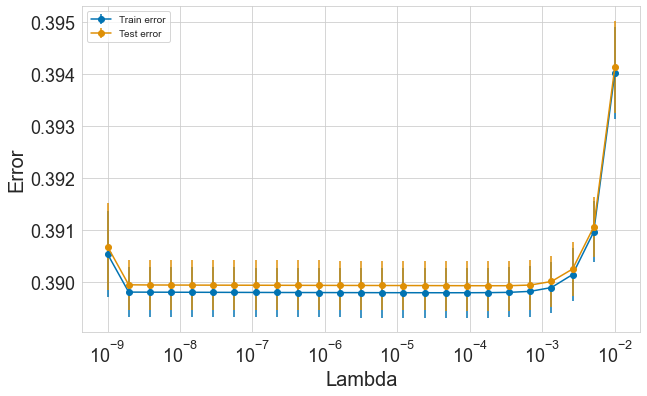

In [57]:
k_fold = 4
lambdas = np.logspace(-9, -2, 20)

mse_train = np.empty((len(lambdas), k_fold), float)
mse_test = np.empty((len(lambdas), k_fold), float)

w_initial = np.zeros(num_dim)
max_iters = 100
gamma = 0.1

for l, lambda_ in enumerate(lambdas):
    print('Lambda: {}'.format(lambda_))
    k = 0
    for train_split, test_split in k_fold_iter(y_train, tx_train, k_fold):
        # Train
        w, mse_tr = lasso_GD(train_split[1], train_split[0], w_initial, max_iters, gamma, lambda_)
        mse_train[l, k] = mse_tr

        # Test
        mse_te = compute_loss_mse(test_split[1], test_split[0], w)
        mse_test[l, k] = mse_te
        
        k += 1

fig = cross_validation_visualization(lambdas, mse_train, mse_test)

avg_mse_test = np.mean(mse_test, axis=1)
lambda_opt = lambdas[np.argmin(avg_mse_test)]

print('Minimum test error {} with lambda {}'.format(np.min(avg_mse_test), lambda_opt))

## 3.2 Lasso regression using subgradient method

In [94]:
# Find optimal ridge regression model under lambda_opt
max_iter = 1000
gamma = 0.1
w_lasso, mse_lasso = lasso_GD(y_train, tx_train, w_initial, max_iters, gamma, lambda_opt)

# Test error on evaluation set
y_eval_pred = predict_labels(w_lasso, tx_eval)

acc_lasso = get_accuracy(y_eval_pred, y_eval)
f1_lasso = get_f1_score(y_eval_pred, y_eval)

print('Accuracy on evaluation set: ', acc_ridge)
print('F1 Score on evaluation set:', f1_ridge)

# Save current model predictions on test set
y_test_pred = predict_labels(w_lasso, tx_test)
create_csv_submission(ids_test, y_test_pred, '../data/lasso_submission.csv')

Gradient Descent(0/99): loss=0.3910522139442991, gradient=0.7635882956606208
Gradient Descent(1/99): loss=0.38988267443507363, gradient=0.17363760573082376
Gradient Descent(2/99): loss=0.3898234712378237, gradient=0.03948951044420328
Gradient Descent(3/99): loss=0.3898200432782552, gradient=0.009001806310820783
Gradient Descent(4/99): loss=0.389819872968603, gradient=0.002140012720010583
Gradient Descent(5/99): loss=0.3898197870615962, gradient=0.0007871103400040745
Gradient Descent(6/99): loss=0.3898197255101201, gradient=0.0006390141135528869
Gradient Descent(7/99): loss=0.38981966153321257, gradient=0.0006255394740135875
Gradient Descent(8/99): loss=0.38981959911637676, gradient=0.0006201215529258067
Gradient Descent(9/99): loss=0.3898195372338913, gradient=0.0006152571013374492
Gradient Descent(10/99): loss=0.3898194761038347, gradient=0.0006105300418308536
Gradient Descent(11/99): loss=0.38981941566771994, gradient=0.0006059029504695377
Gradient Descent(12/99): loss=0.389819355930

# 4 Model comparison

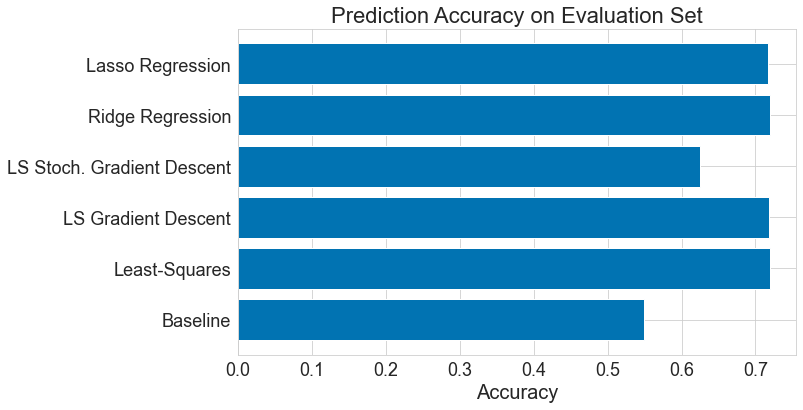

In [59]:
accuracy = [acc_baseline, acc_ls, acc_GD, acc_SGD, acc_ridge, acc_lasso]
labels = ['Baseline', 'Least-Squares', 'LS Gradient Descent', 'LS Stoch. Gradient Descent', 'Ridge Regression', 'Lasso Regression']

fig, ax = plt.subplots(figsize=(10,6))

ax.barh([i for i in range(len(accuracy))], accuracy)

ax.set(title='Prediction Accuracy on Evaluation Set', xlabel='Accuracy',
       yticks=[i for i in range(len(labels))], yticklabels=labels);

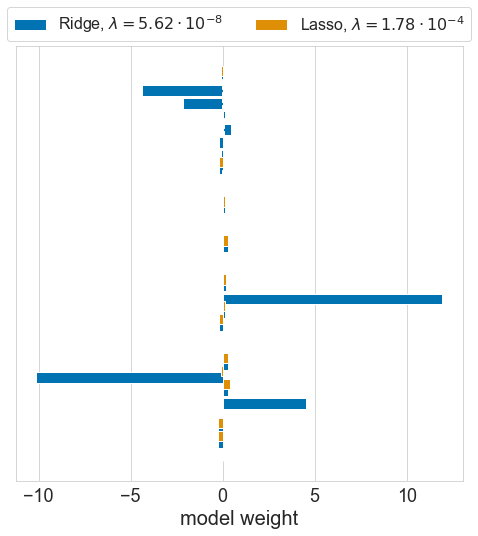

In [95]:
fig, ax = plt.subplots(figsize=(8,8))
ax.barh([i for i in range(num_dim)], w_ridge, label='Ridge, $\lambda = 5.62 \cdot 10^{-8}$')
ax.barh([i+.5 for i in range(num_dim)], w_lasso, label='Lasso, $\lambda = 1.78 \cdot 10^{-4}$')

ax.legend(fontsize=16, loc='center', bbox_to_anchor=(.5,1.05), ncol=2)

ax.set(yticks=[], xlabel='model weight');

# 5 Feature Selection 

In [ ]:
c = np.corrcoef(tx_train)

In [ ]:
c.shape

In [118]:
?np.corrcoef

In [112]:
# Load data
y_top, tx_top, _ = load_csv_data('../data/train_top_twenty.csv')

# Normalise data
tx_top, mean_tx_top, std_tx_top = standardise(tx_top)

# Check shape of data
print('Shape: y: {}, x:{}\n'.format(y.shape, tx_top.shape))

num_samples, num_dim_top = tx.shape

# Check that data is normalised
print(np.mean(tx_top, axis=0), np.std(tx_top, axis=0))

# Split into train and evaluation set
(tx_top_train, y_train), (tx_top_eval, y_eval) = train_eval_split(y, tx_top, split_ratio=.7, seed=SEED)

# Load test data with reduced feature space
_, tx_top_test, _ = load_csv_data('../data/test_top_twenty.csv')

# Don't forget to standardise to same mean and std
tx_top_test = standardise_to_fixed(tx_top_test, mean_tx_top, std_tx_top)

Shape: y: (250000,), x:(250000, 20)

[-2.50270382e-15  4.48725856e-15  7.19034432e-15 -2.36302302e-14
 -3.20729487e-15  1.26038877e-14  2.86094082e-15 -6.98242575e-15
  4.02186640e-15 -1.27422117e-14 -5.97875394e-15 -8.99406061e-15
 -6.01698247e-16 -4.92140906e-15  3.11615622e-15 -1.67606551e-15
 -9.40864542e-15  1.79148900e-14 -5.09692022e-15 -1.77026038e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 5.1 Compare performance of least-squares with reduced feature space

Accuracy LS on evaluation set:  0.7087733333333334
F1 Score LS on evaluation set: 0.6516427432216906


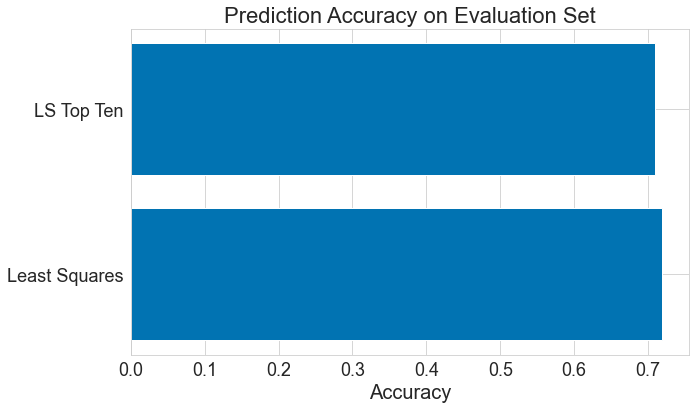

In [111]:
# Get linear least-squares model
w_ls_top, mse_ls_top = least_squares(y_train, tx_top_train)

# Test error on evaluation set
y_eval_pred = predict_labels(w_ls_top, tx_top_eval)

acc_ls_top = get_accuracy(y_eval_pred, y_eval)
f1_ls_top = get_f1_score(y_eval_pred, y_eval)

print('Accuracy LS on evaluation set: ', acc_ls_top)
print('F1 Score LS on evaluation set:', f1_ls_top)

# Save current mode predictions on test set
y_test_pred = predict_labels(w_ls_top, tx_top_test)
create_csv_submission(ids_test, y_test_pred, '../data/least_squares_top_ten_submission.csv')

accuracy = [acc_ls, acc_ls_top]
labels = ['Least Squares', 'LS Top Ten']
fig, ax = plt.subplots(figsize=(10,6))

ax.barh([i for i in range(len(accuracy))], accuracy)

ax.set(title='Prediction Accuracy on Evaluation Set', xlabel='Accuracy',
       yticks=[i for i in range(len(labels))], yticklabels=labels);